# PISA Data Exploration
## by Ken Norton

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

My questions:

* Does the age when a child begins learning affect academic performance?
* How do political freedom and civil rights relate to academic performance?
* Does economic, social, and cultural status (ESCS) relate to academic performance?

## Preliminary Wrangling

## Load Data

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [7]:
# Plot styles
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

# We have a lot of columns in our data set
pd.set_option('display.max_columns', 650)
pd.set_option('display.max_rows', 650)
pd.set_option('display.width', 1000)

In [8]:
# Using low_memory=False here to suppress the dtype errors
# per: https://stackoverflow.com/a/40585000
df = pd.read_csv('data/pisa2012.csv', low_memory=False, encoding='latin1')

In [9]:
# Import the freedom scores
df_free = pd.read_csv('data/Freedom_in_the_World_2012.csv')

## Assessment

In [10]:
# High level inspection
df.shape

(485490, 636)

In [11]:
df.sample(5)

Unnamed: 0                CNT  SUBNATIO  STRATUM      OECD                         NC  SCHOOLID  STIDSTD  ST01Q01  ST02Q01  ST03Q01  ST03Q02 ST04Q01                      ST05Q01  ST06Q01    ST07Q01    ST07Q02    ST07Q03 ST08Q01 ST09Q01  ST115Q01 ST11Q01 ST11Q02 ST11Q03 ST11Q04 ST11Q05 ST11Q06            ST13Q01 ST14Q01 ST14Q02 ST14Q03 ST14Q04                             ST15Q01                ST17Q01 ST18Q01 ST18Q02 ST18Q03 ST18Q04                             ST19Q01          ST20Q01          ST20Q02          ST20Q03  ST21Q01               ST25Q01 ST26Q01 ST26Q02 ST26Q03 ST26Q04 ST26Q05 ST26Q06 ST26Q07 ST26Q08 ST26Q09 ST26Q10 ST26Q11 ST26Q12 ST26Q13 ST26Q14  ST26Q15  ST26Q16  ST26Q17        ST27Q01        ST27Q02        ST27Q03        ST27Q04        ST27Q05              ST28Q01 ST29Q01   ST29Q02   ST29Q03   ST29Q04         ST29Q05 ST29Q06         ST29Q07         ST29Q08         ST35Q01         ST35Q02   ST35Q03         ST35Q04         ST35Q05         ST35Q06         ST37Q01  \
365015      365016             Norway   5780000  NOR0001      OECD                    Norway         45     1106       10      1.0        8     1996    Male  Yes, for more than one year      6.0        NaN        NaN        NaN  None    None         1.0     Yes     Yes      No     Yes      No      No  <ISCED level 3A>       No      No     Yes      No        Working full-time <for pay>   <ISCED level 3B, 3C>       No      No      No      No        Working full-time <for pay>   Country of test  Country of test  Country of test      NaN  Language of the test     Yes     Yes     Yes     Yes      No     Yes      No      No     Yes     Yes      No     Yes     Yes     Yes   578001   578001  7777777  Three or more  Three or more  Three or more  Three or more            Two          0-10 books      NaN       NaN       NaN       NaN             NaN     NaN             NaN             NaN             NaN             NaN       NaN             NaN             NaN             NaN             NaN   
178400      178401            Finland   2460000  FIN0002      OECD                    Finland        98     2726        9      1.0        5     1996    Male  Yes, for more than one year      7.0  No, never  No, never        NaN  None    None         1.0     Yes     Yes      No      No      No      No   <ISCED level 1>       No      No      No      No  Other (e.g. home duties, retired)        <ISCED level 1>       No      No      No      No  Other (e.g. home duties, retired)   Country of test  Country of test  Country of test      NaN  Language of the test     Yes     Yes     Yes     Yes      No     Yes     Yes     Yes     Yes     Yes     Yes     Yes     Yes     Yes   246001   246001   246002  Three or more  Three or more            Two            One            One       201-500 books    Agree  Disagree  Disagree  Disagree           Agree   Agree           Agree        Disagree  Strongly agree  Strongly agree  Disagree           Agree           Agree        Disagree  Very confident   
410152      410153  Connecticut (USA)   8400200  QUB9797  Non-OECD  United States of America         33     1102       10      1.0        3     1997    Male  Yes, for more than one year      6.0  No, never  No, never  No, never  None    None         1.0     Yes     Yes     Yes     Yes     Yes     NaN  <ISCED level 3A>      NaN     NaN     Yes     NaN        Working full-time <for pay>       <ISCED level 3A>      NaN     NaN     Yes     NaN        Working full-time <for pay>   Country of test  Country of test  Country of test      NaN  Language of the test     Yes     Yes     Yes     Yes      No     Yes      No      No      No     Yes     Yes     Yes      No     Yes   840001   840001   840002            Two  Three or more            One            Two  Three or more         11-25 books    Agree     Agree     Agree  Disagree  Strongly agree   Agree  Strongly agree  Strongly agree           Agree           Agree     Agree  Strongly agree  Strongly agree  Strongly agree       Confident   
306881  

In [12]:
df.describe()

Unnamed: 0      SUBNATIO       SCHOOLID        STIDSTD        ST01Q01        ST02Q01        ST03Q01        ST03Q02        ST06Q01       ST115Q01       ST21Q01       ST26Q15       ST26Q16       ST26Q17        ST57Q01        ST57Q02        ST57Q03        ST57Q04        ST57Q05        ST57Q06        ST69Q01        ST69Q02        ST69Q03        ST70Q01        ST70Q02        ST70Q03        ST71Q01        ST72Q01       ST101Q01       ST101Q02      ST101Q03       ST101Q05       ST104Q01       ST104Q04       ST104Q05       ST104Q06        IC05Q01        IC06Q01        IC07Q01       EC04Q01A       EC04Q01B       EC04Q01C       EC04Q02A       EC04Q02B       EC04Q02C       EC04Q03A       EC04Q03B       EC04Q03C       EC04Q04A      EC04Q04B       EC04Q04C       EC04Q05A       EC04Q05B       EC04Q05C       EC04Q06A       EC04Q06B       EC04Q06C      CLCUSE301      CLCUSE302        DEFFORT            AGE          GRADE         ANXMAT         ATSCHL       ATTLNACT         BELONG  \
count  485490.000000  4.854900e+05  485490.000000  485490.000000  485490.000000  485438.000000  485490.000000  485490.000000  457994.000000  479269.000000  32728.000000  4.854900e+05  4.854900e+05  4.854900e+05  301367.000000  269808.000000  283813.000000  279657.000000  289502.000000  289428.000000  299618.000000  298601.000000  291943.000000  296878.000000  298339.000000  289068.000000  255665.000000  294163.000000  311290.000000  310906.000000  310321.00000  310655.000000  310449.000000  309969.000000  310366.000000  310156.000000  485490.000000  485490.000000  485490.000000  169730.000000  169765.000000  169779.000000  169783.000000  169784.000000  169798.000000  169796.000000  169786.000000  169799.000000  169655.000000  169641.00000  169656.000000  169716.000000  169716.000000  169725.000000  169643.000000  169640.000000  169636.000000  485490.000000  485490.000000  485490.000000  485374.000000  484617.000000  314764.000000  312584.000000  311675.000000  313399.000000   
mean   242745.500000  4.315457e+06     240.152197    6134.066201       9.813323       2.579260       6.558512    1996.070061       6.148963       1.265356      6.481117  7.103064e+05  7.268785e+05  8.130810e+05       5.493770       1.623629       0.954044       0.911821       1.213363       1.583081      52.744331      52.911273      52.722812       4.228060       4.350246       4.047826      31.138885      26.017759       1.831800       2.026944       2.83132       2.180995       1.879072       2.834719       1.963050       1.930719      39.524894      40.569633      41.019310       1.648448       1.462251       1.850506       1.755941       1.470916       1.761770       1.641782       1.698255       1.663773       1.737544       1.68622       1.583711       1.666631       1.568732       1.745824       1.777203       1.717301       1.517467      18.799584      19.917745      13.867758      15.784283      -0.162964       0.152647       0.051644       0.041384      -0.022259   
std    140149.035431  2.524434e+06     278.563016    6733.144944       3.734726       2.694013       3.705244       0.255250       0.970693       0.578992      4.579245  1.583832e+06  1.629829e+06  1.811846e+06       5.383815       2.591569       2.162574       2.362377       2.353292       2.760885      16.903873      17.007616      16.635498       1.652415       1.652565       2.539119       9.090506       9.223134       0.891414       0.914075       0.97202       0.909405       0.805788       0.998822       0.885696       0.854910      46.390983      45.463542      45.306261       0.477456       0.498574       0.356576       0.429529       0.499155       0.426002       0.479478       0.459016       0.472419       0.439971       0.46403       0.492944       0.471418       0.495255       0.435398       0.416125       0.450312       0.499696      29.807876      29.078596      32.474850       0.290221       0.655558       0.955031       1.002942       0.997704       0.983503   
min         1.000000  8.000000e+04       1

In [13]:
df_free.sample(5)

country  political_rights  civil_liberties freedom_status
17           Finland                 1                1              F
9   China (Shanghai)                 7                6             NF
55            Sweden                 1                1              F
27             Italy                 2                1              F
12        Costa Rica                 1                1              F

### What is the structure of your dataset?

The set has **485,490 rows** representing individual students in the survey. There are **636 columns** that contain data about lots of different factors about the student, there they live, their economic, social, and cultural status, their attitudes about learning, and their performance on a panel of math, reading, and science assessments. Many of the qualitative columns contain contain string values that represent a scale (e.g. "Never" -> "Every day"). There's a wealth of data here!

### What is/are the main feature(s) of interest in your dataset?

The features of interest from the PISA dataset to me are primarily:

* `NC` - country code (there is another code called CNT but that seems to include sub-regions, such as Florida and Massachusetts)
* `ST04Q01` - the student's gender (Male or Female)
* `PV1MATH-PV5MATH` - plausible values that represent scores on the mathematic section
* `PV1READ-PV5READ` - plausible values that represent scores on the reading section
* `PV1SCIE-PV5SCIE` - plausible values that represent scores on the science section
* `EC06Q01` - the year the student began learning the language the test was given in
* `ESCS` - a single index that combines several economic, social and cultural status factors. It's expressed as +/- standard deviations from the mean of population (where 0 = mean)
* `ANCMTSUP` - mathematics teacher support, anchored. It's expressed as +/- standard deviations from the mean of population (where 0 = mean)

And from the _Freedom House_ dataset I'll be using:

* `political_rights` - degree of a country's political freedom, scale of 1=most free to 7=least free
* `civil_liberties` - degree of a country's civil liberties, scale of 1=most free to 7=least free
* `freedom_status` - a single overall rating of the country's freedom, F, PF, and NF stand for Free, Partly Free, and Not Free

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

For my assessment, I'll be using `ESCS` to represent student economic, social, and cultural status. I'll be creating new values to average each of the 5 math, reading, and science tests into single scores for each subject. I'll also be looking at these factors against the _Freedom House_ freedom scores.

## Cleaning

In [14]:
# Make a copy for cleaning
df_clean = df.copy()

### Freedom House data

Now I'm going to join the Freedom House data

In [15]:
# Join the Freedom House data, drop the dupe country column
df_clean = pd.merge(df_clean, df_free, left_on='NC', right_on='country')
df_clean.drop(columns=['country'], inplace=True)


In [12]:
# Test to make sure the join worked
# Expect: PF, NF, or F with no NaN
df_clean.freedom_status.unique()

array(['PF', 'NF', 'F'], dtype=object)

In [13]:
# Convert the freedom_status field to an ordered dtype
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=['NF', 'PF', 'F'])

df_clean['freedom_status'] = df_clean['freedom_status'].astype(ordered_var)


### Math/Reading/Science/Overall Literacy Scores

From the [PISA Data Visualization Contest instructions](https://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm): "Pupil performance in mathematics, reading and science is coded by plausible values. You can find them in columns: `PV1MATH-PV5MATH` (for math), `PV1READ-PV5READ` (for reading) and `PV1SCIE-PV5SCIE` (for science). For given area all five values PV1-PV5 are just independent estimations of the student performance in given area. For exploration it is fine to use only PV1."

Based on this, I've decided to use the average of each of the five scores in each category as an overall "literacy" value. I then compute the average of *all* questions to stand as an overall literacy score.

In [16]:
# Each score is scaled to a mean of 500 and a standard deviation of 100

# Average of the five MATH assessment scores
df_clean['math_literacy'] = (
    (df_clean['PV1MATH'] + df_clean['PV2MATH'] + df_clean['PV3MATH'] +
     df_clean['PV4MATH'] + df_clean['PV5MATH']) / 5)

# Average of the five READING assessment scores
df_clean['read_literacy'] = (
    (df_clean['PV1READ'] + df_clean['PV2READ'] + df_clean['PV3READ'] +
     df_clean['PV4READ'] + df_clean['PV5READ']) / 5)

# Average of the five SCIENCE assessment scores
df_clean['sci_literacy'] = (
    (df_clean['PV1SCIE'] + df_clean['PV2SCIE'] + df_clean['PV3SCIE'] +
     df_clean['PV4SCIE'] + df_clean['PV5SCIE']) / 5)

# Average of all assessment scores
df_clean['overall_literacy'] = (
    (df_clean['PV1MATH'] + df_clean['PV2MATH'] + df_clean['PV3MATH'] +
     df_clean['PV4MATH'] + df_clean['PV5MATH'] + df_clean['PV1READ'] +
     df_clean['PV2READ'] + df_clean['PV3READ'] + df_clean['PV4READ'] +
     df_clean['PV5READ'] + df_clean['PV1SCIE'] + df_clean['PV2SCIE'] +
     df_clean['PV3SCIE'] + df_clean['PV4SCIE'] + df_clean['PV5SCIE']) / 15)

### Age Started Learning Language

In [17]:
# EC06Q01 = age started learning
df_clean.EC06Q01.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [18]:
# Convert the EC06Q01 field to an ordered dtype
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=[
                                                '0 to 3 years', 
                                                '4 to 6 years',
                                                '7 to 9 years',
                                                '10 to 12 years',
                                                '13 years or older'
                                            ])

df_clean['EC06Q01'] = df_clean['EC06Q01'].astype(ordered_var)


In [19]:
df_clean['EC06Q01'].unique()

[NaN, 0 to 3 years, 4 to 6 years, 10 to 12 years, 7 to 9 years, 13 years or older]
Categories (5, object): [0 to 3 years < 4 to 6 years < 7 to 9 years < 10 to 12 years < 13 years or older]

### Remove unused columns

Our dataframe is massive which can make it unwieldly to analyze. We're going to reduce it to only those columns we'll be using in our analysis.

In [20]:
df_clean = df_clean[[
    'STIDSTD', 'NC', 'ESCS', 'EC06Q01', 'ST04Q01', 'ANCMTSUP', 'overall_literacy',
    'math_literacy', 'read_literacy', 'sci_literacy', 'civil_liberties',
    'political_rights', 'freedom_status'
]]


In [21]:
df_clean.rename(columns={
    'STIDSTD': 'student_id',
    'NC': 'country',
    'EC06Q01': 'age_start_learn',
    'ST04Q01': 'gender',
    'ANCMTSUP': 'math_teacher_support'
},
                inplace=True)


In [22]:
df_clean.head()

student_id  country  ESCS age_start_learn  gender  math_teacher_support  overall_literacy  math_literacy  read_literacy  sci_literacy  civil_liberties  political_rights freedom_status
0           1  Albania   NaN             NaN  Female               -0.5983        333.038020      366.18634      261.01424     371.91348                3                 3             PF
1           2  Albania   NaN             NaN  Female                   NaN        444.458700      470.56396      384.68832     478.12382                3                 3             PF
2           3  Albania   NaN             NaN  Female                   NaN        465.776413      505.53824      405.18154     486.60946                3                 3             PF
3           4  Albania   NaN             NaN  Female                   NaN        460.296973      449.45476      477.46376     453.97240                3                 3             PF
4           5  Albania   NaN             NaN  Female                0.4052        336.223953      385.50398      256.01010     367.15778                3                 3             PF

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238752 entries, 0 to 238751
Data columns (total 13 columns):
student_id              238752 non-null int64
country                 238752 non-null object
ESCS                    230000 non-null float64
age_start_learn         24727 non-null category
gender                  238752 non-null object
math_teacher_support    151806 non-null float64
overall_literacy        238752 non-null float64
math_literacy           238752 non-null float64
read_literacy           238752 non-null float64
sci_literacy            238752 non-null float64
civil_liberties         238752 non-null int64
political_rights        238752 non-null int64
freedom_status          238752 non-null object
dtypes: category(1), float64(6), int64(3), object(3)
memory usage: 23.9+ MB


In [24]:
# Save a copy of the cleaned dataframe
df_clean.to_csv('data/pisa2012_clean.csv')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Which countries did the students come from?

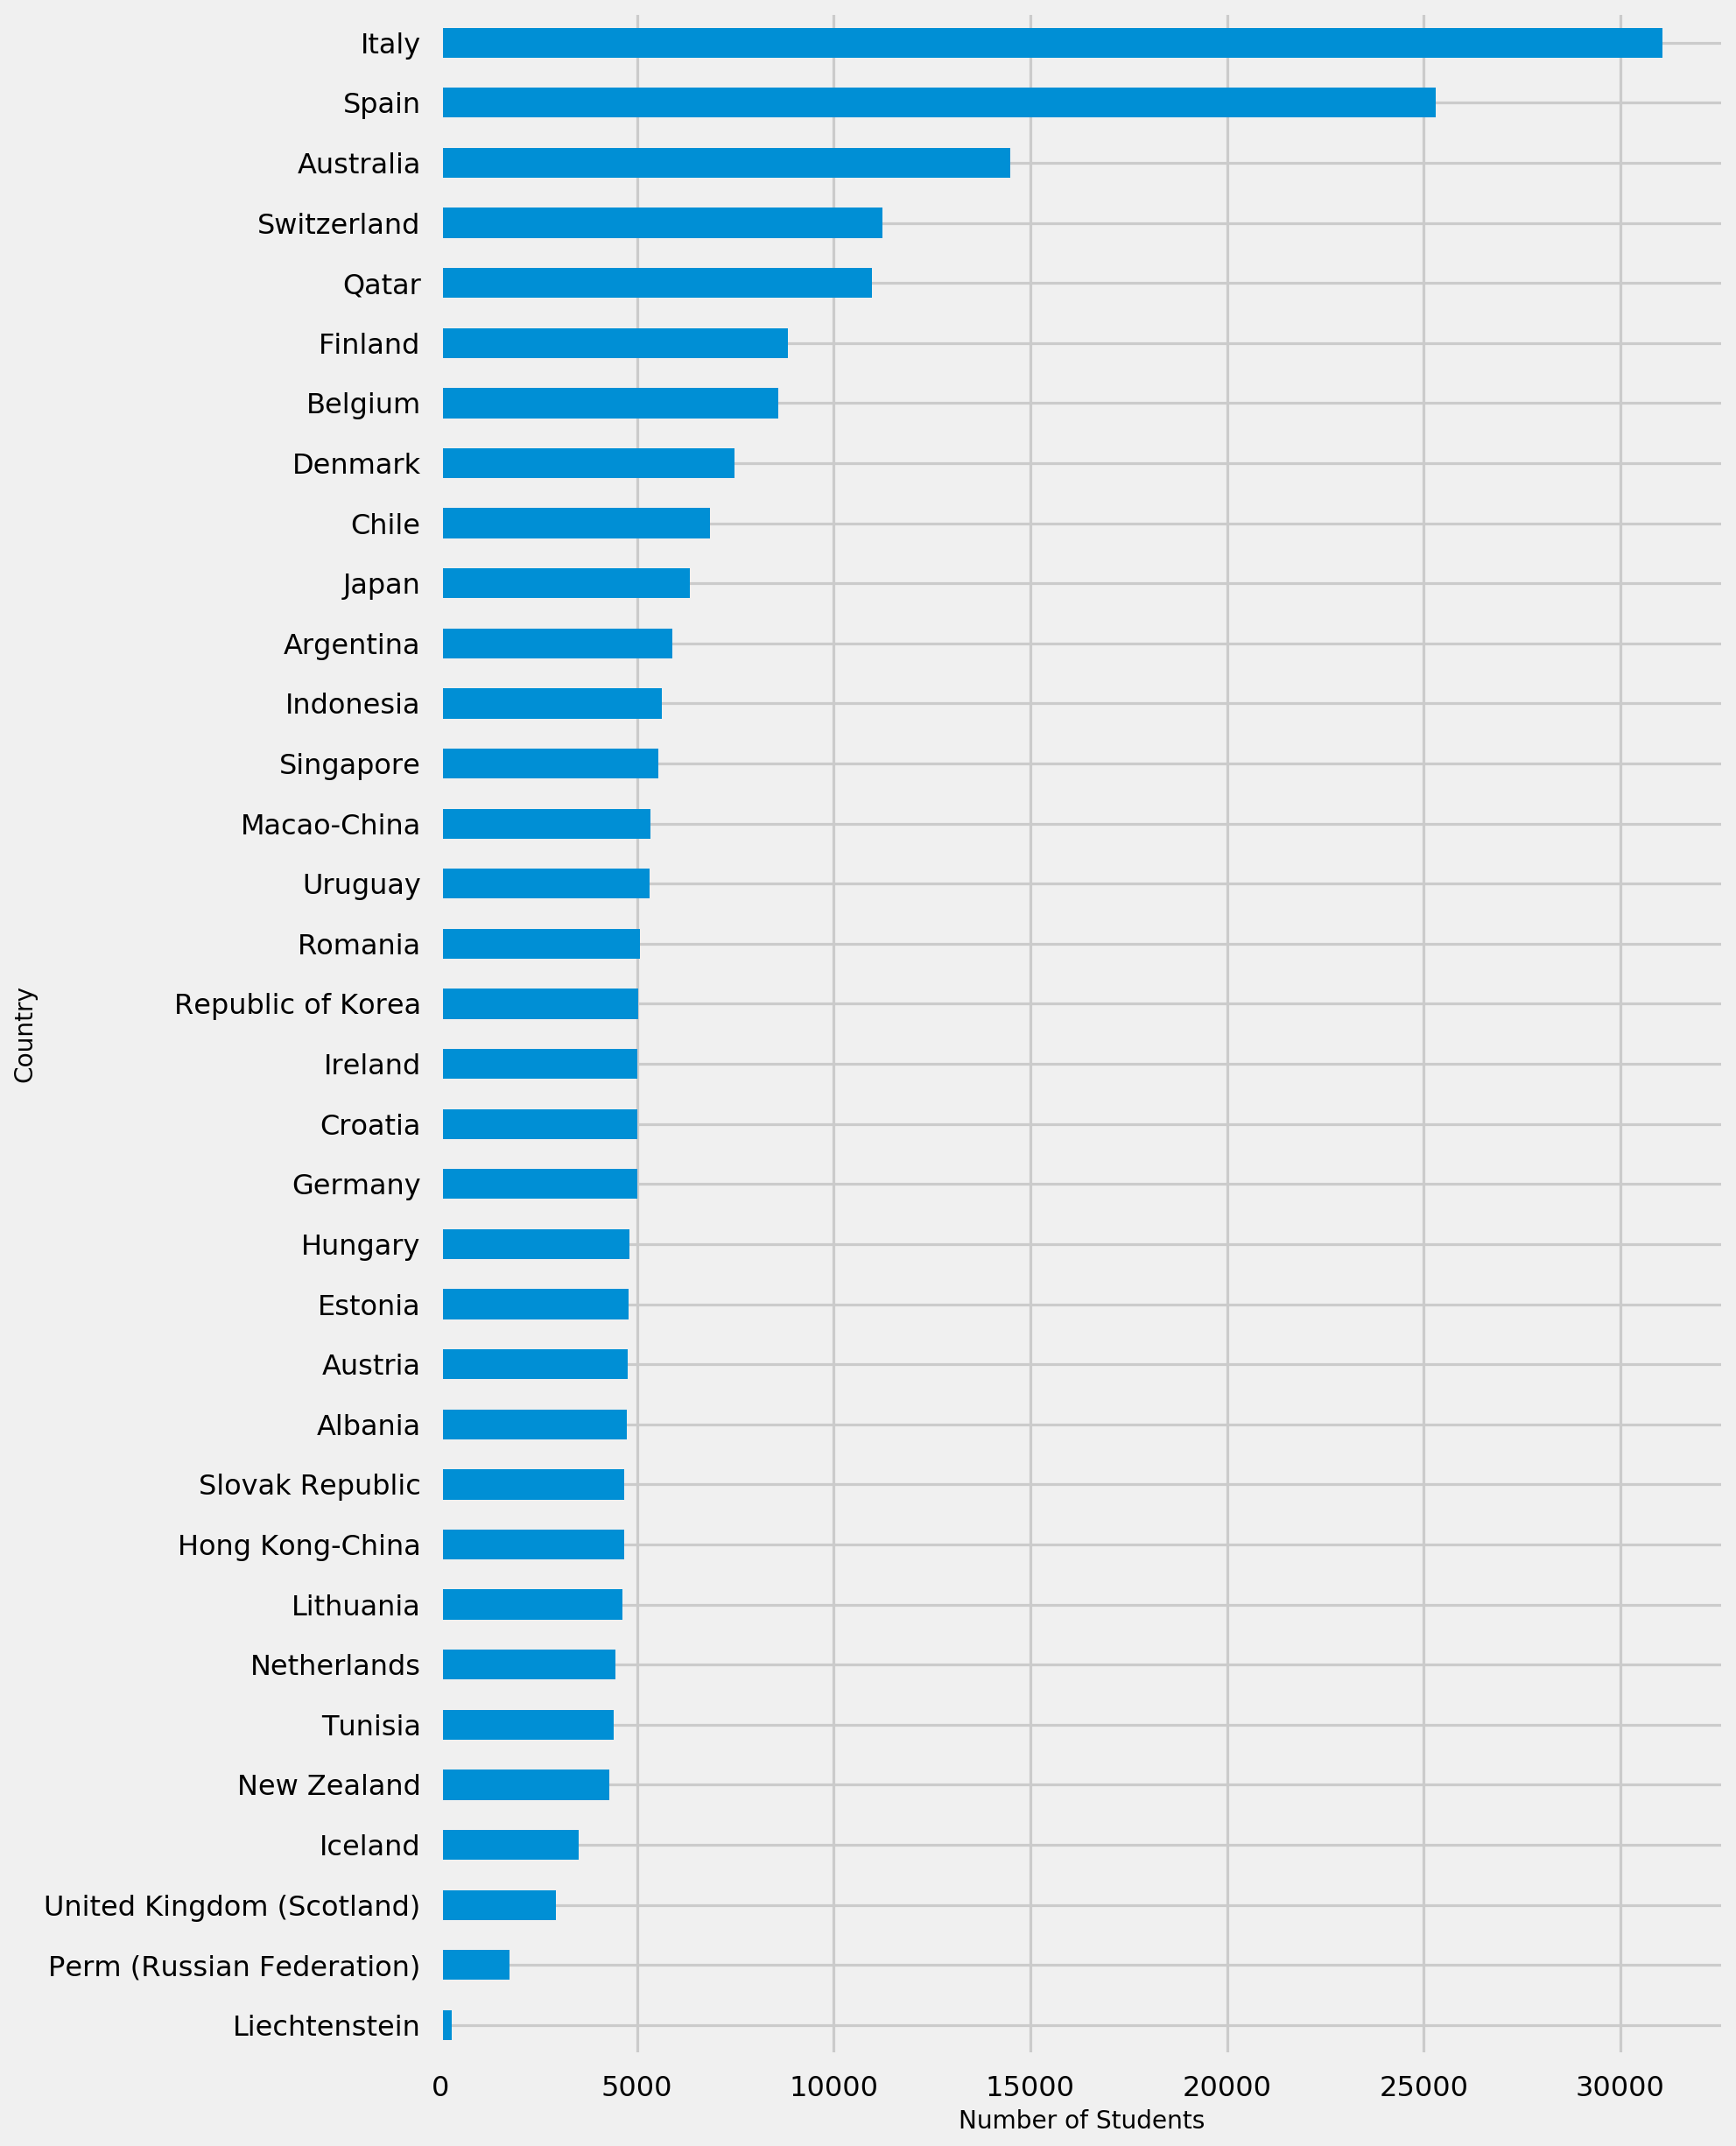

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 20)
df_clean['country'].value_counts(ascending=True).plot(kind="barh")
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Number of Students", fontsize=14)
plt.show()
fig.savefig("images/students-by-country.png")

### Age Started Learning Language

In [26]:
df_clean['age_start_learn'].value_counts(normalize=True) * 100

0 to 3 years         66.651838
4 to 6 years         22.449145
7 to 9 years          5.880212
10 to 12 years        3.134226
13 years or older     1.884580
Name: age_start_learn, dtype: float64

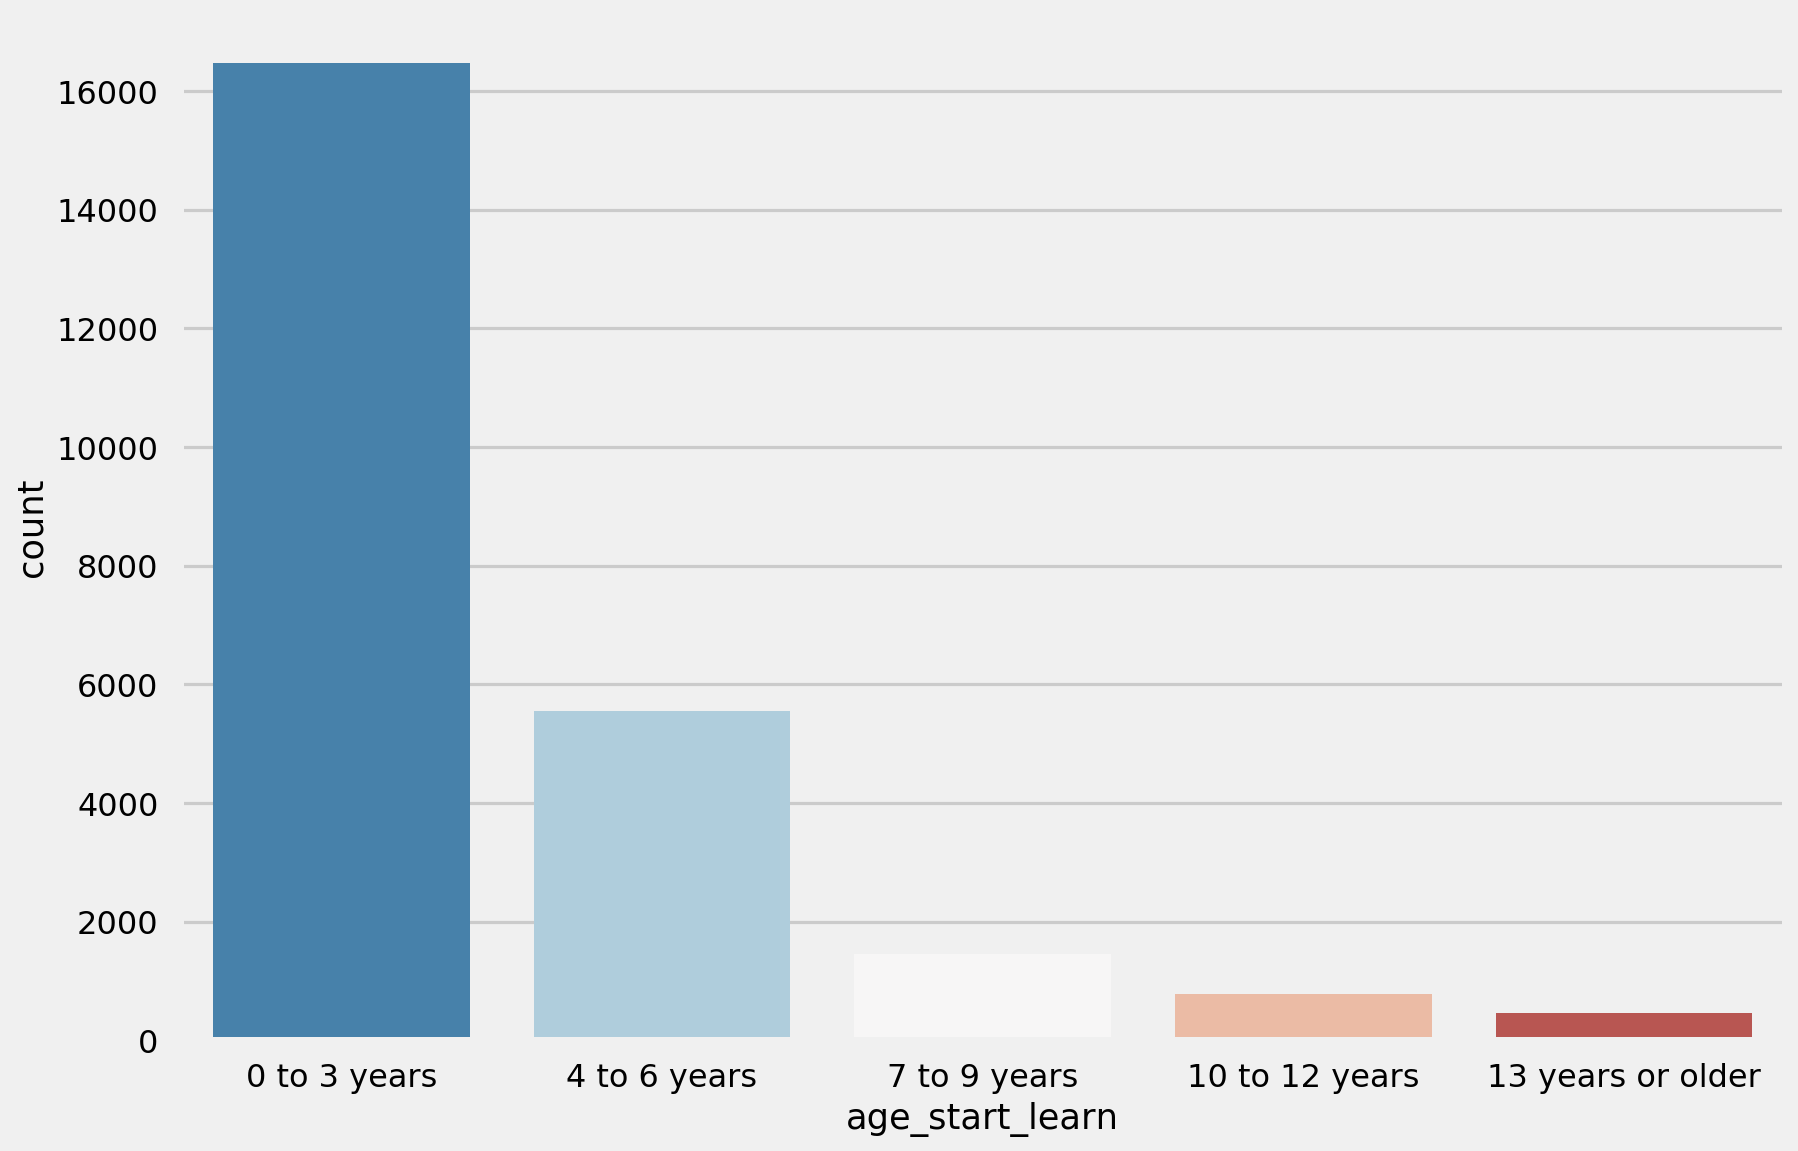

In [27]:
sns.countplot(data=df_clean, x='age_start_learn', palette='RdBu_r')
plt.show()


### Overall Math/Reading/Science Scores

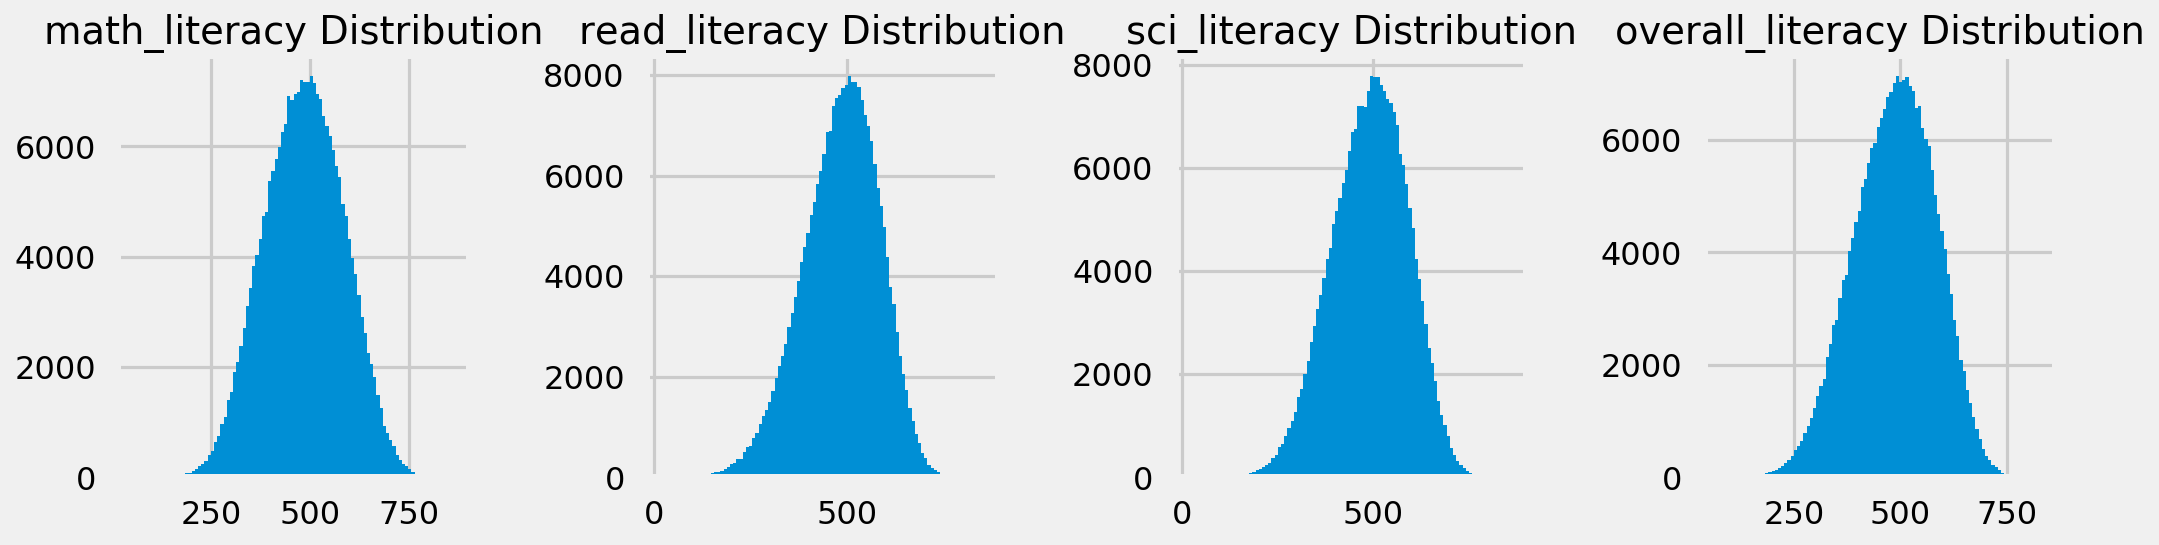

In [28]:
# Function for plotting multiple histograms from here:
# https://stackoverflow.com/questions/29530355/plotting- \
# multiple-histograms-in-grid
def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)
        df[var_name].hist(bins=100, ax=ax)
        ax.set_title(var_name + " Distribution")
    fig.set_size_inches(15, 4)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


draw_histograms(df_clean, 
                ['math_literacy', 
                 'read_literacy', 
                 'sci_literacy',
                 'overall_literacy'], 
                1, 4)


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [29]:
numeric_vars = [
    'ESCS', 'math_teacher_support', 'overall_literacy', 'math_literacy', 'read_literacy',
    'sci_literacy', 'civil_liberties', 'political_rights'
]


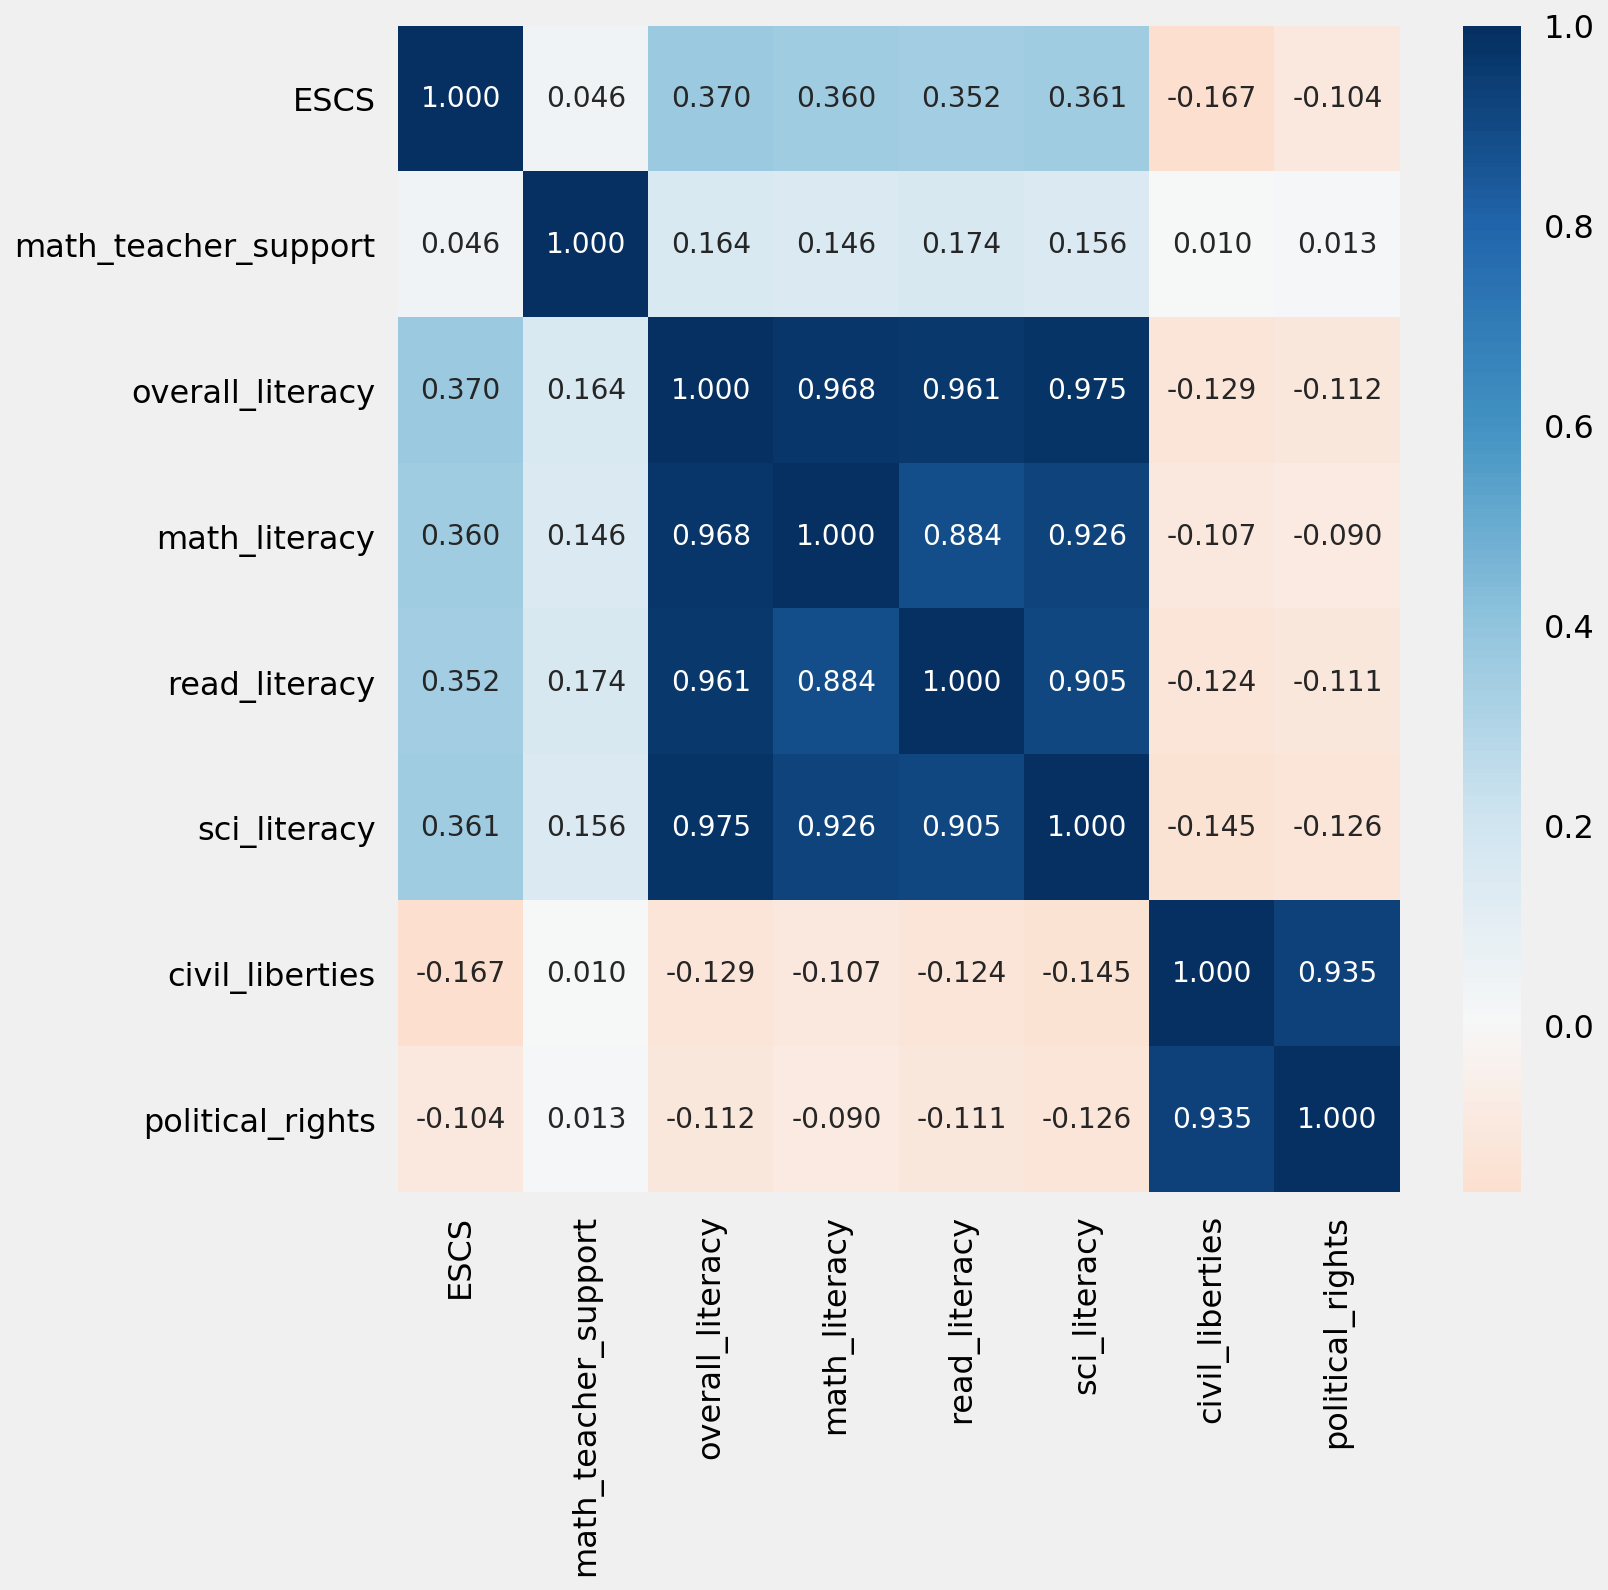

In [30]:
# correlation plot
plt.figure(figsize=[10, 10])
sns.heatmap(df_clean[numeric_vars].corr(),
           annot=True,
           fmt='.3f',
           cmap='RdBu',
           center=0)
plt.show()


/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


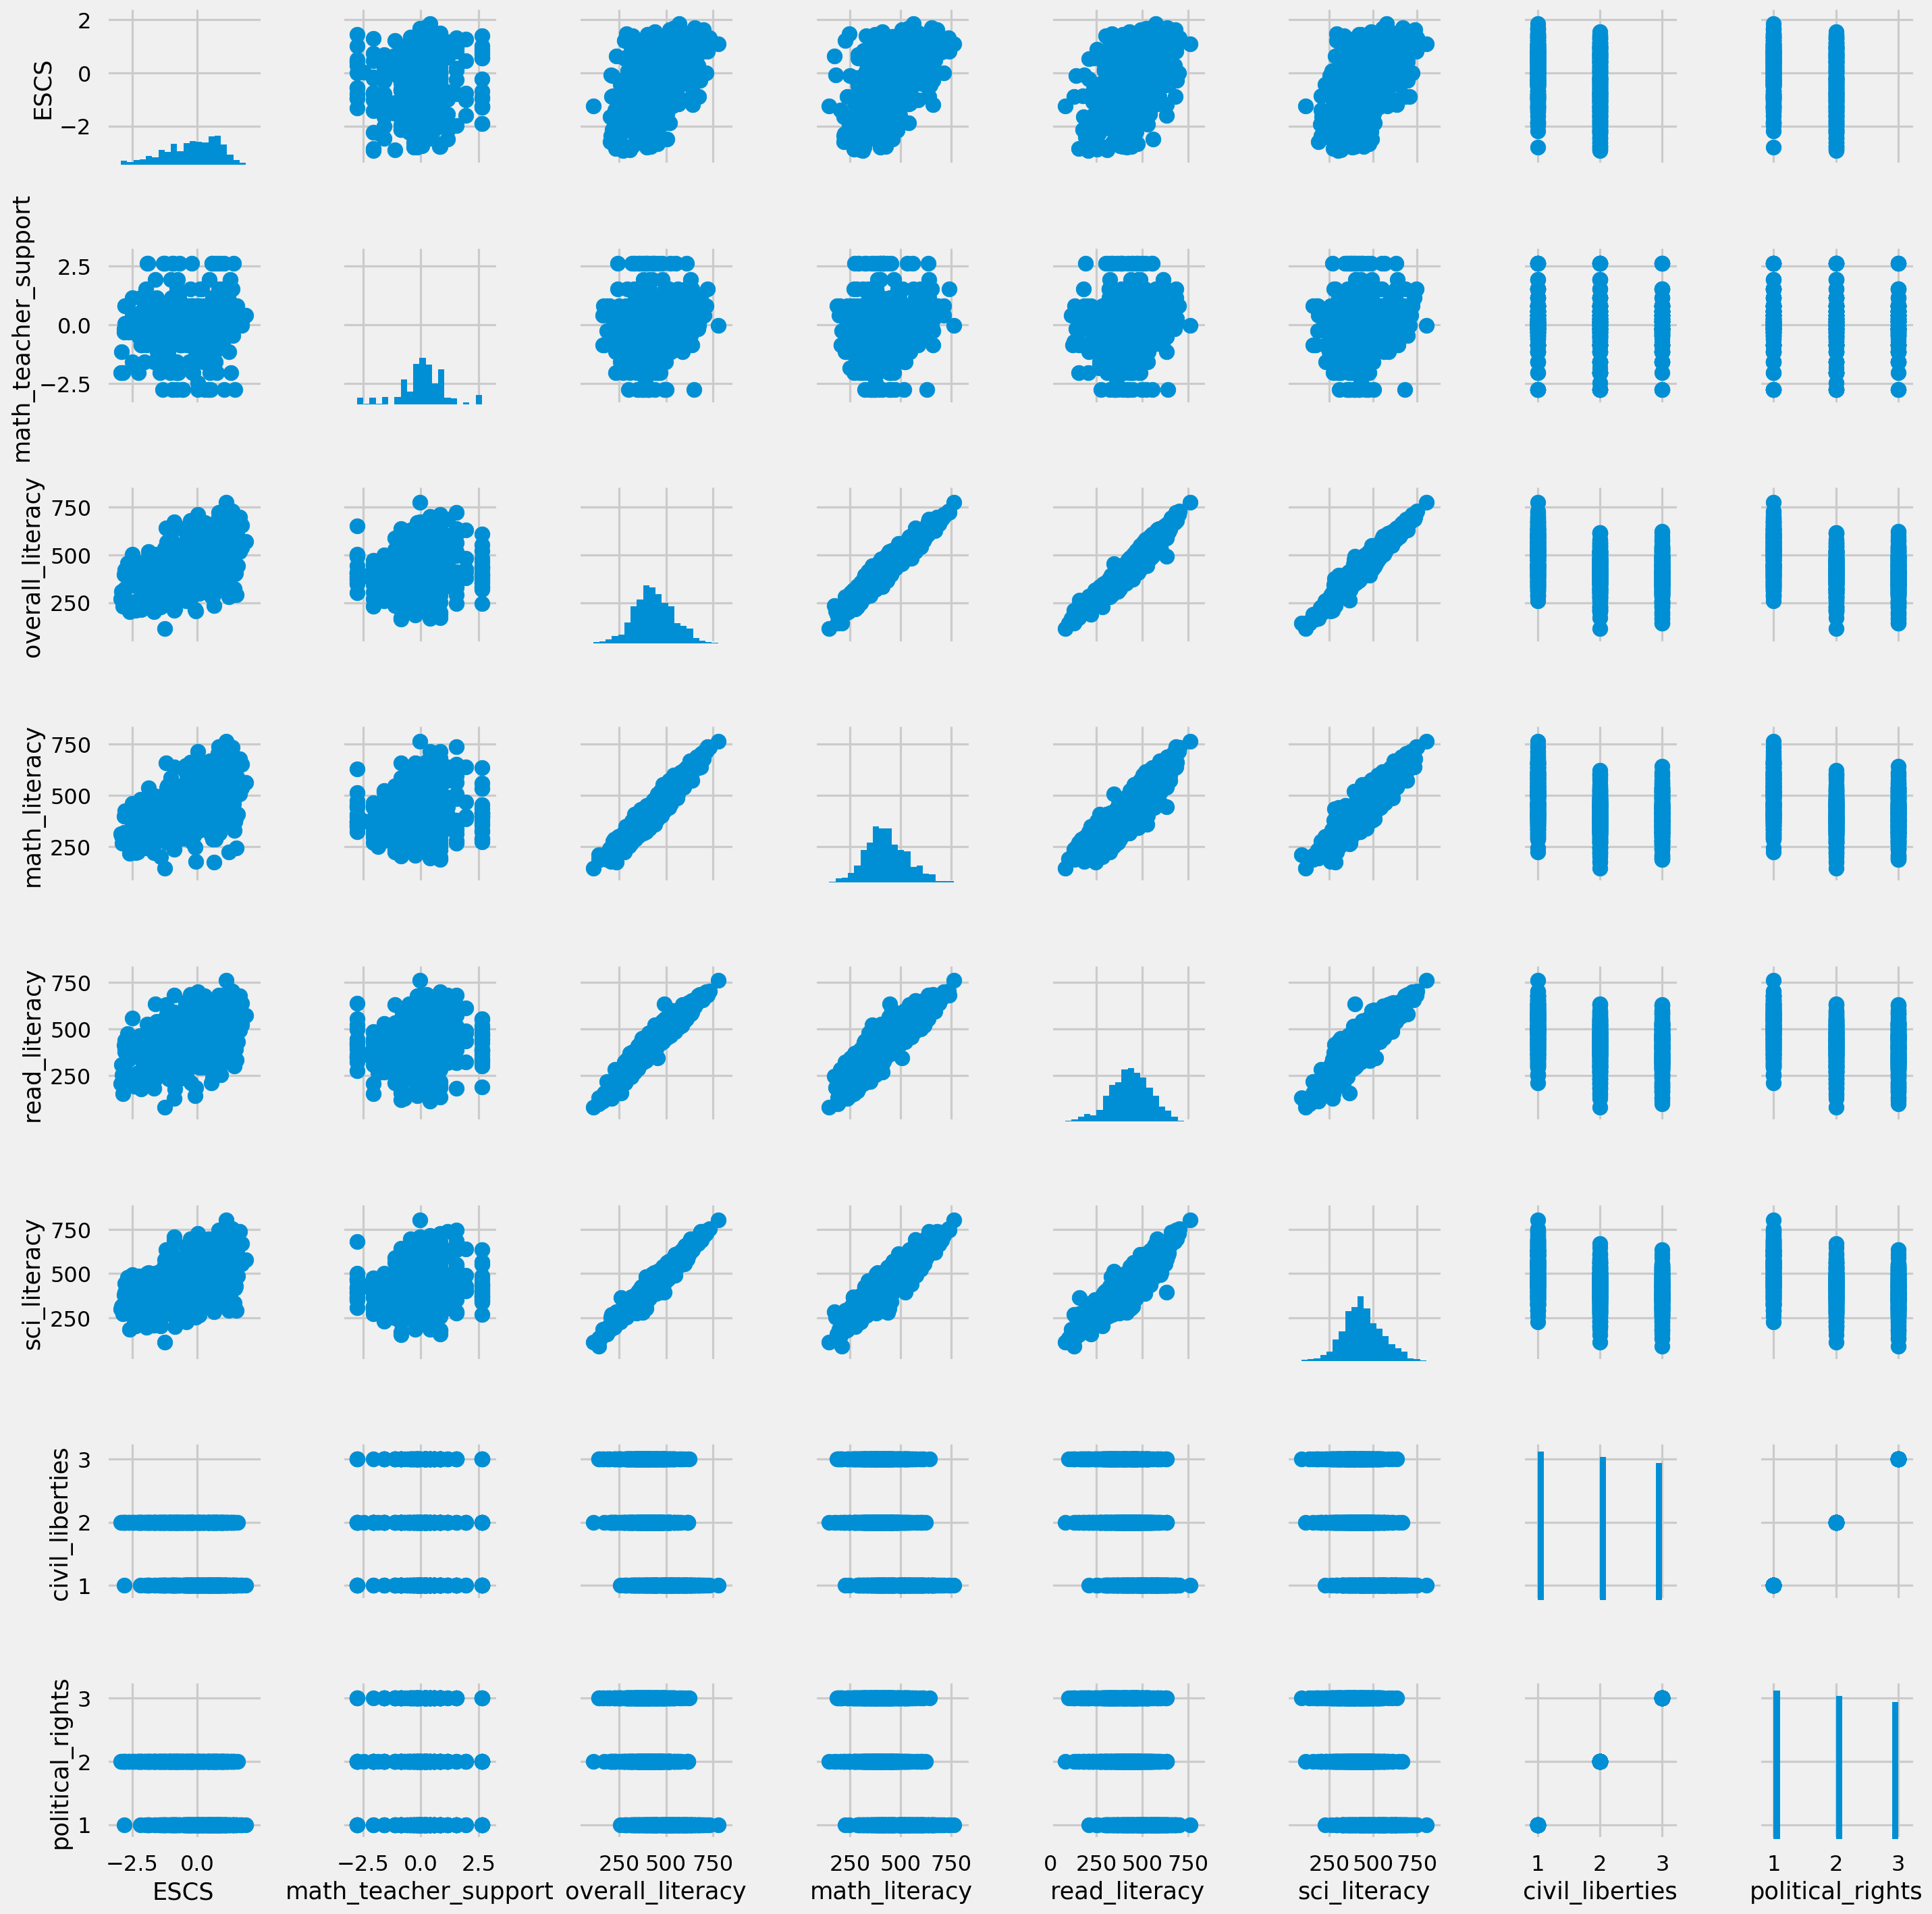

In [31]:
# plot matrix: sample 1000 rows so that plots are clearer and
# they render faster
samples = np.random.choice(df_clean.dropna().shape[0], 1000, replace=False)
df_samp = df_clean.loc[samples, :]

g = sns.PairGrid(data=df_samp, vars=numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter)
plt.show()


### Relationship between Overall Literacy and Civil Liberties

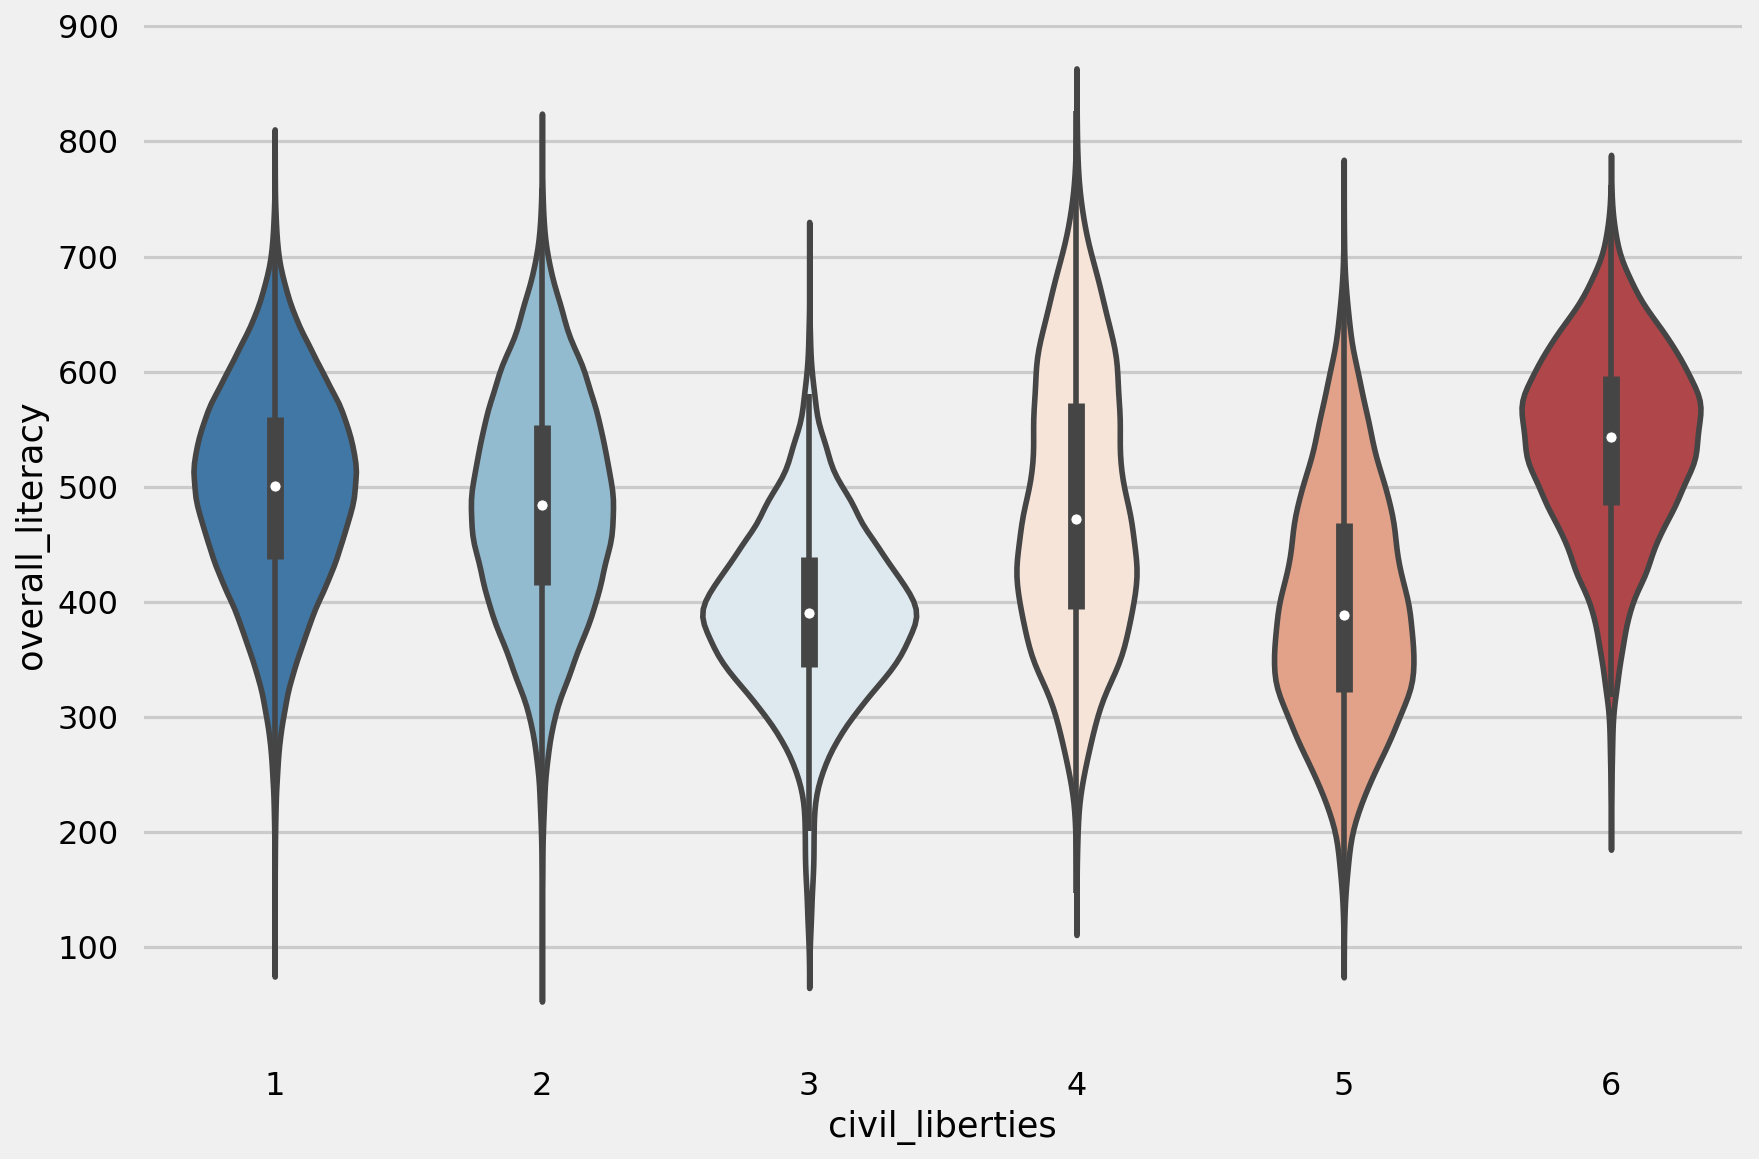

In [32]:
sns.violinplot(data=df_clean,
            x='civil_liberties',
            y='overall_literacy',
            palette='RdBu_r')
plt.show()


### Relationship between Overall Literacy and Economic, Social, Cultural Opportunity

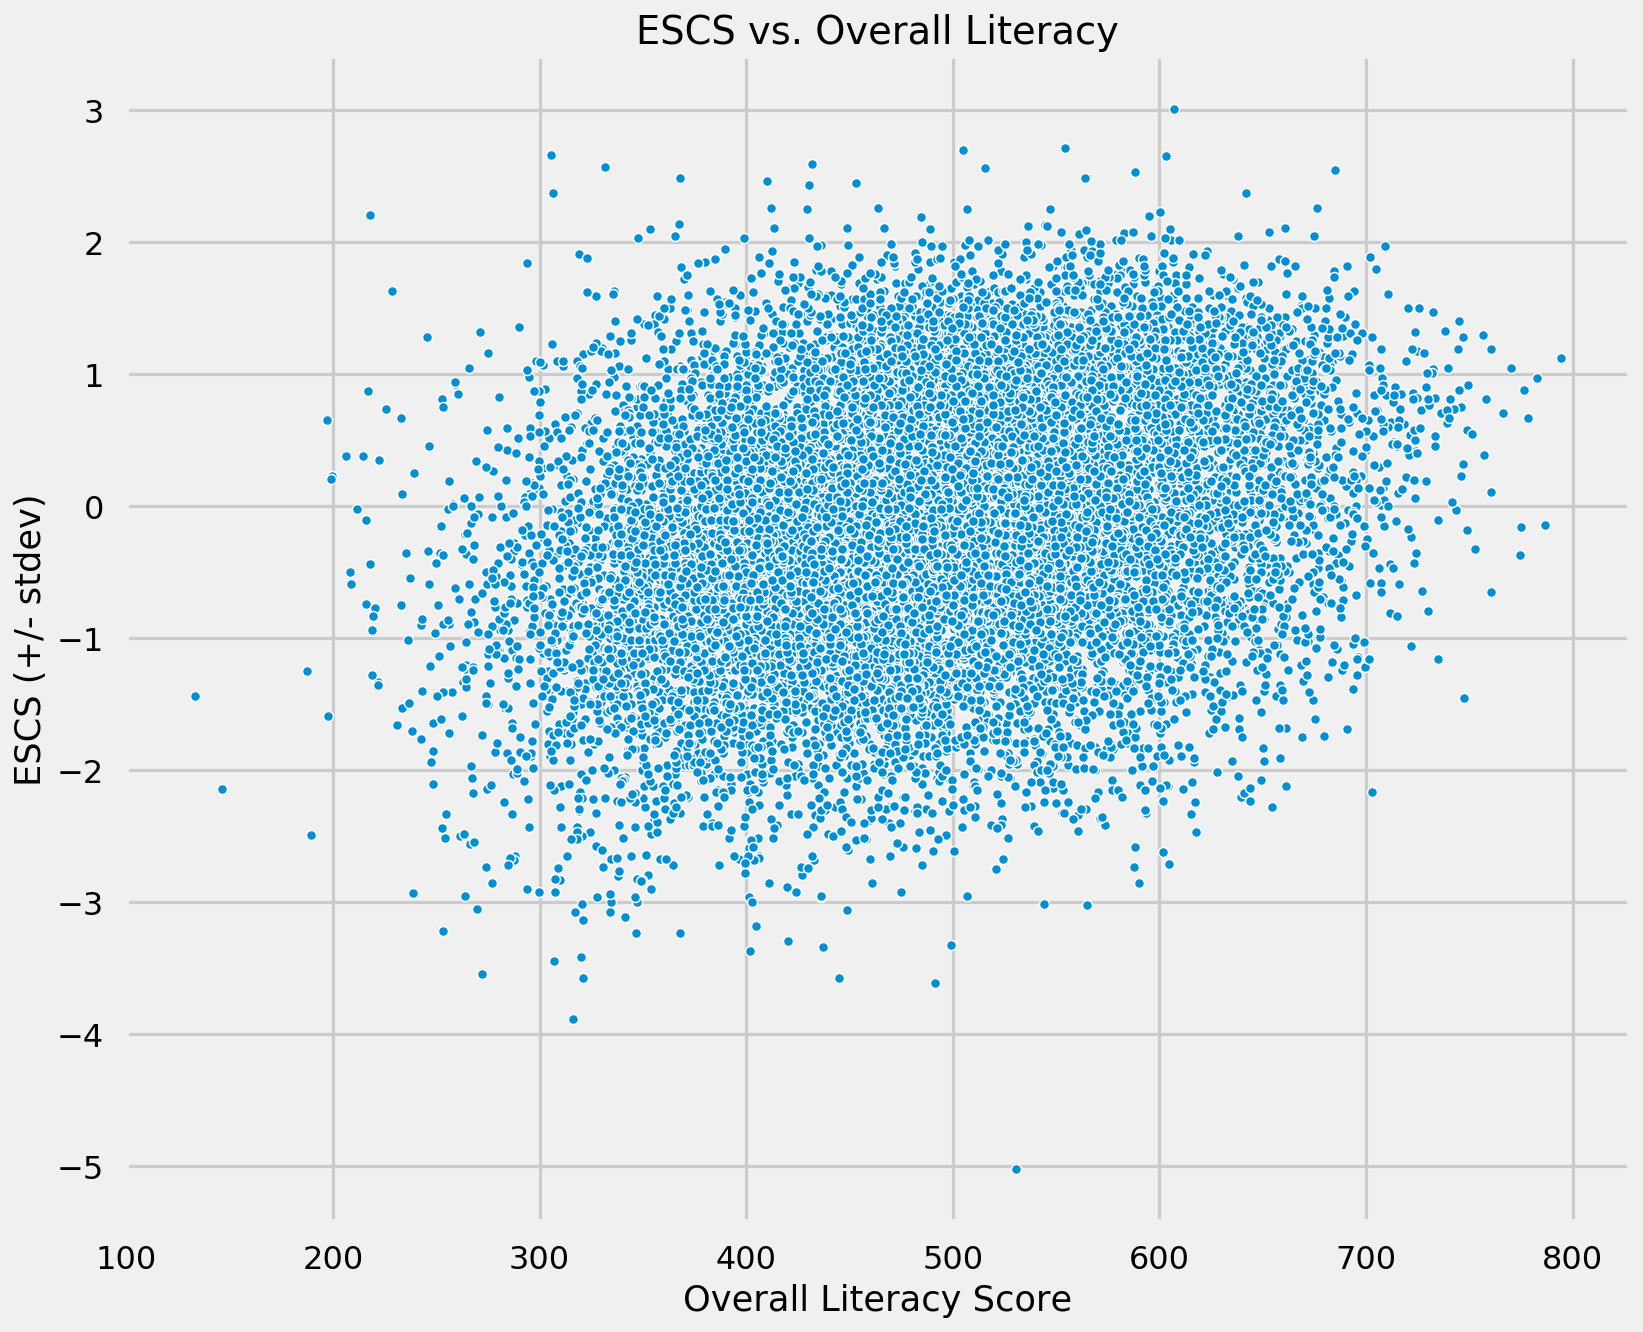

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(data=df_clean.dropna(),
                x='overall_literacy',
                y='ESCS',
                s=25,
                palette='RdBu_r')
plt.title("ESCS vs. Overall Literacy")
plt.ylabel("ESCS (+/- stdev)")
plt.xlabel("Overall Literacy Score")
plt.show()

In [34]:
df_clean['ESCS'].corr(df_clean['overall_literacy'])

0.36995506294850283

### Relationship between Overall Literacy and Economic, Social, Cultural Opportunity

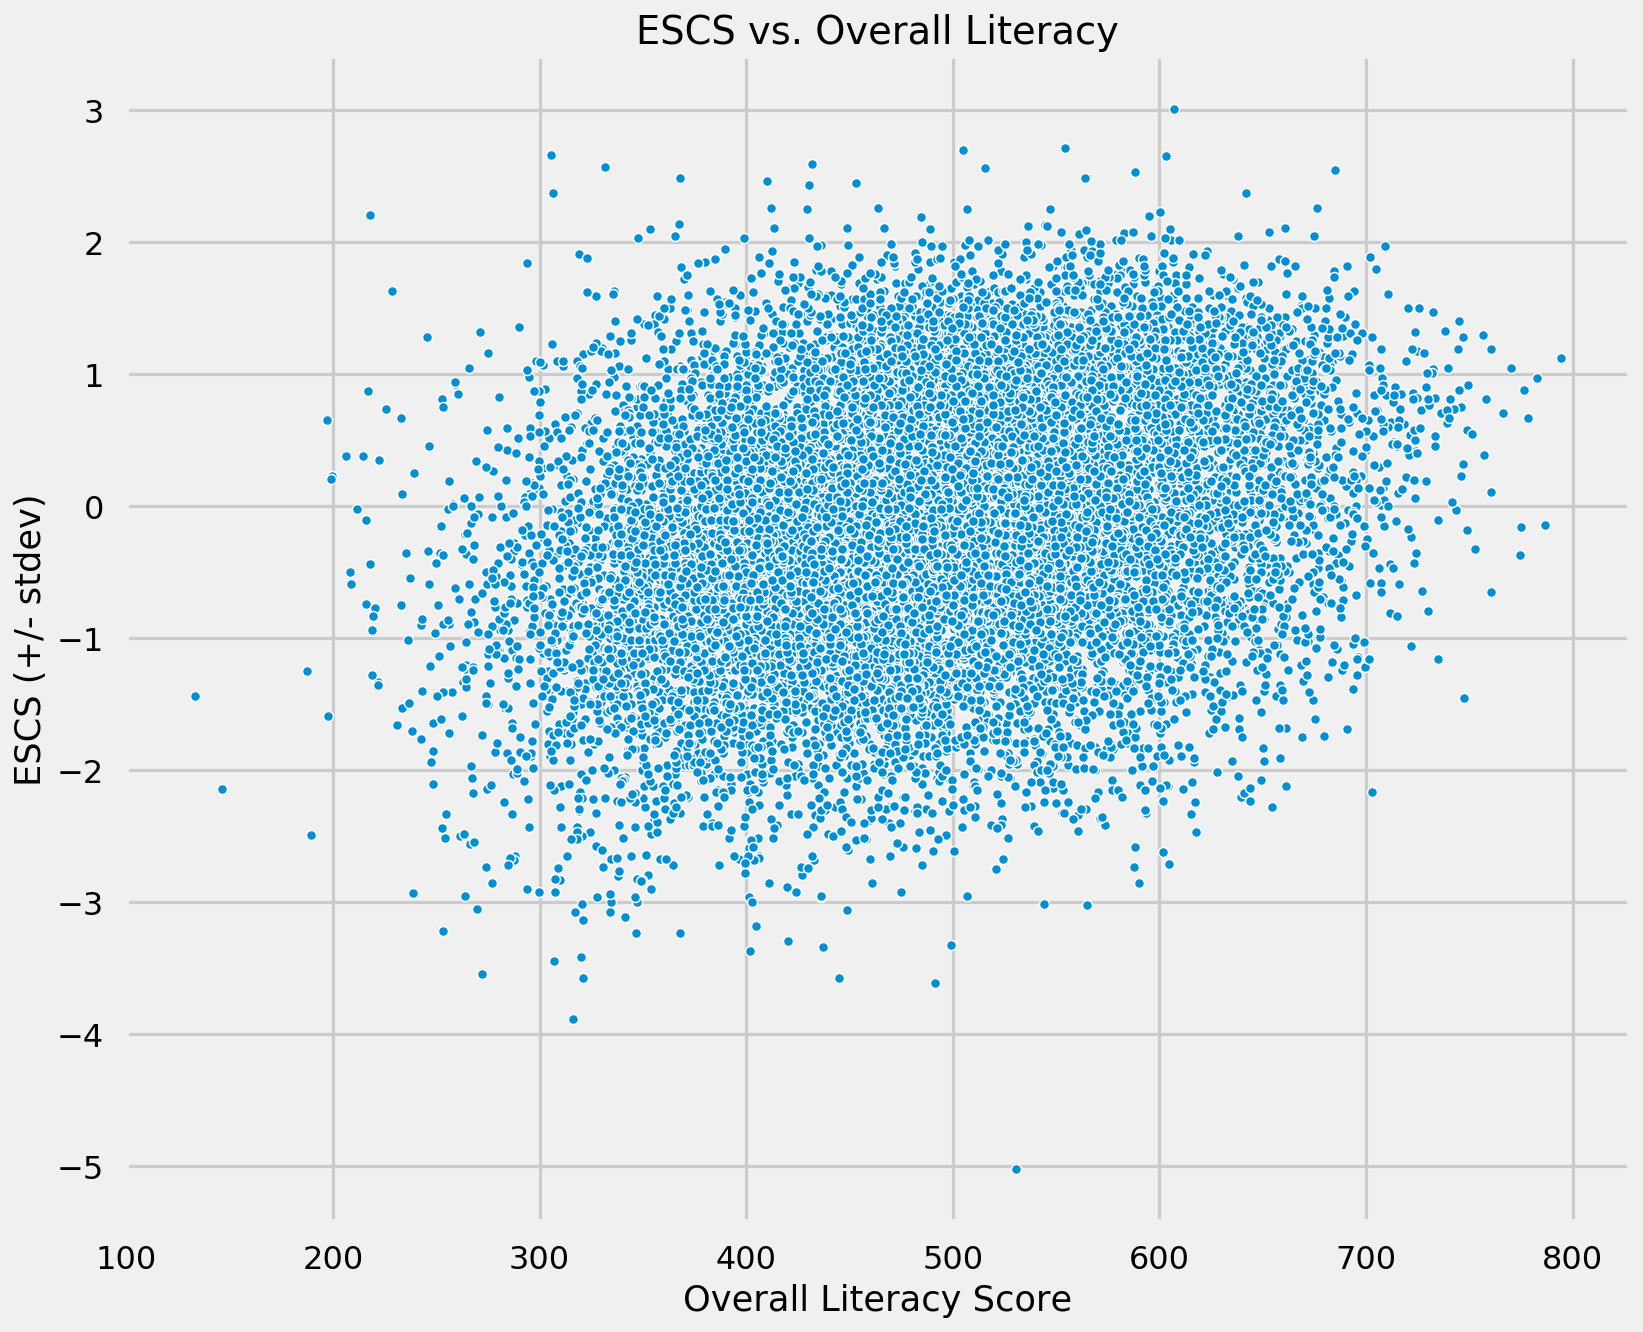

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(data=df_clean.dropna(),
                x='overall_literacy',
                y='ESCS',
                s=25,
                palette='RdBu_r')
plt.title("ESCS vs. Overall Literacy")
plt.ylabel("ESCS (+/- stdev)")
plt.xlabel("Overall Literacy Score")
plt.show()

In [36]:
df_clean['ESCS'].corr(df_clean['overall_literacy'])

0.36995506294850283

### Relationship between Teacher Support and Math Literacy

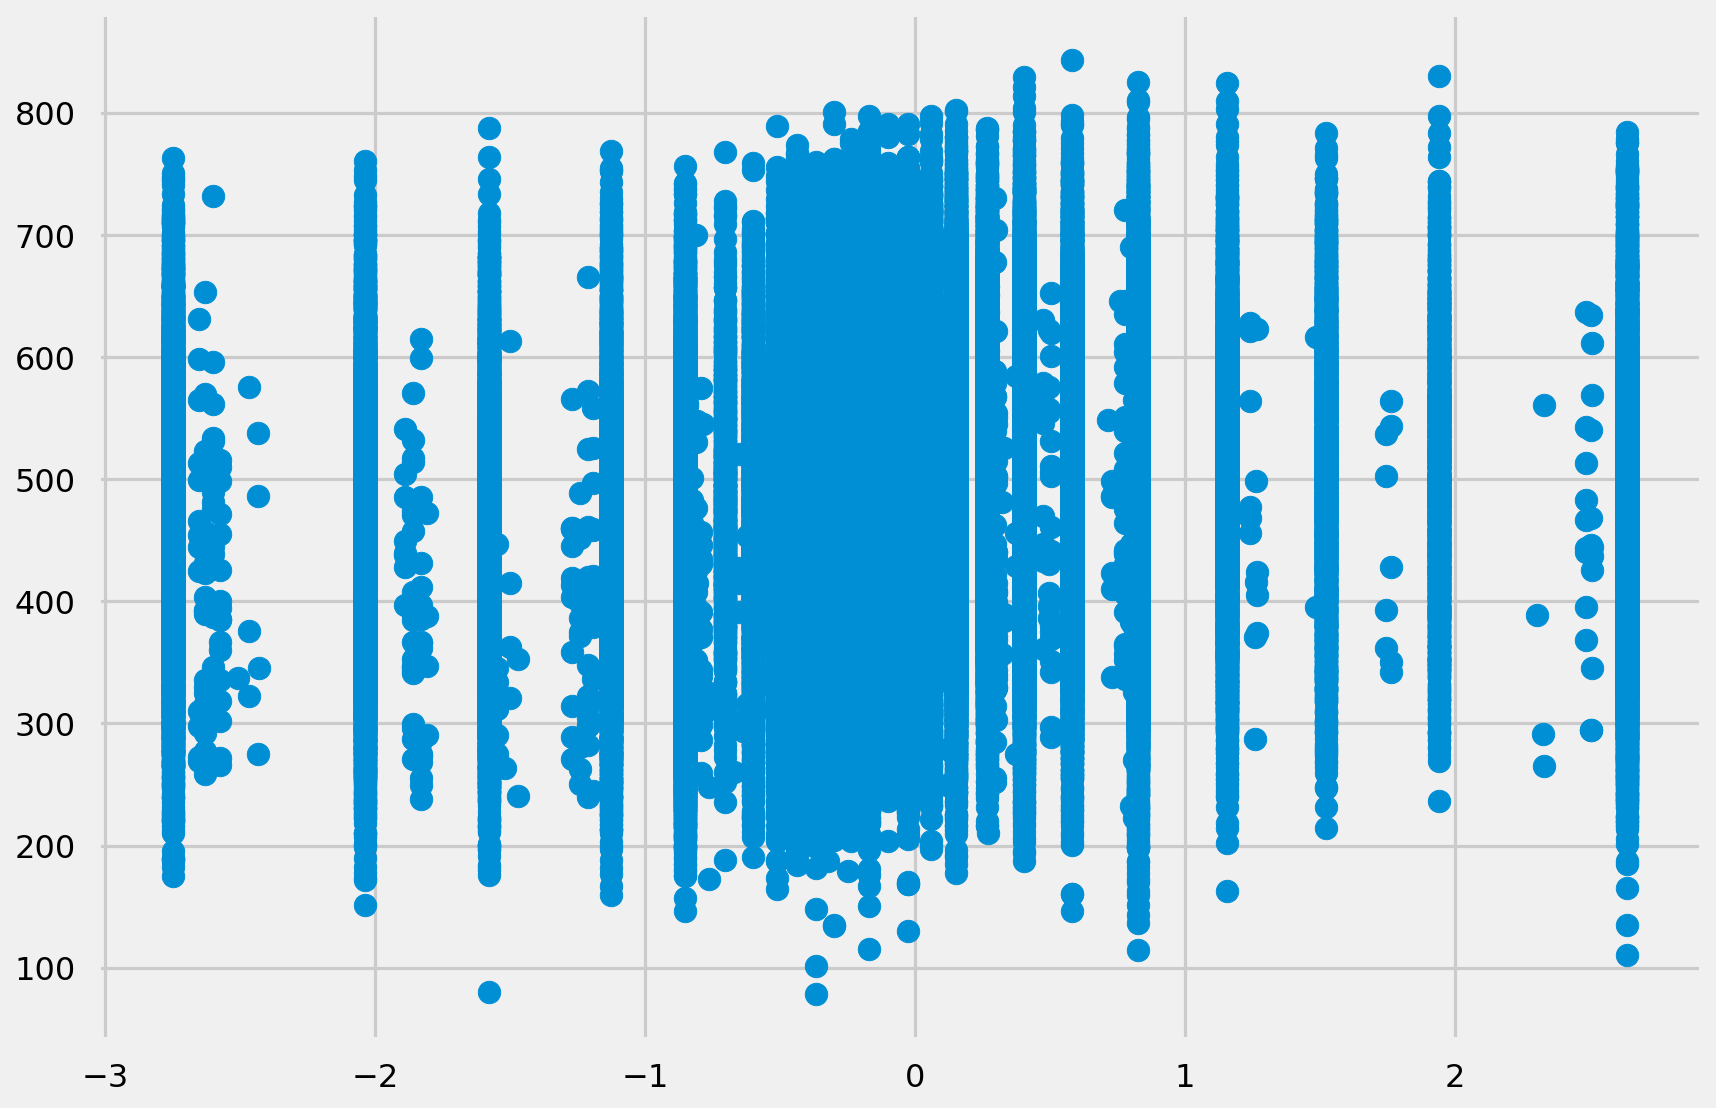

In [42]:
plt.scatter(df_clean['math_teacher_support'], df_clean['math_literacy'])
plt.show()

### Relationship between Reading Literacy and Age Started Learning

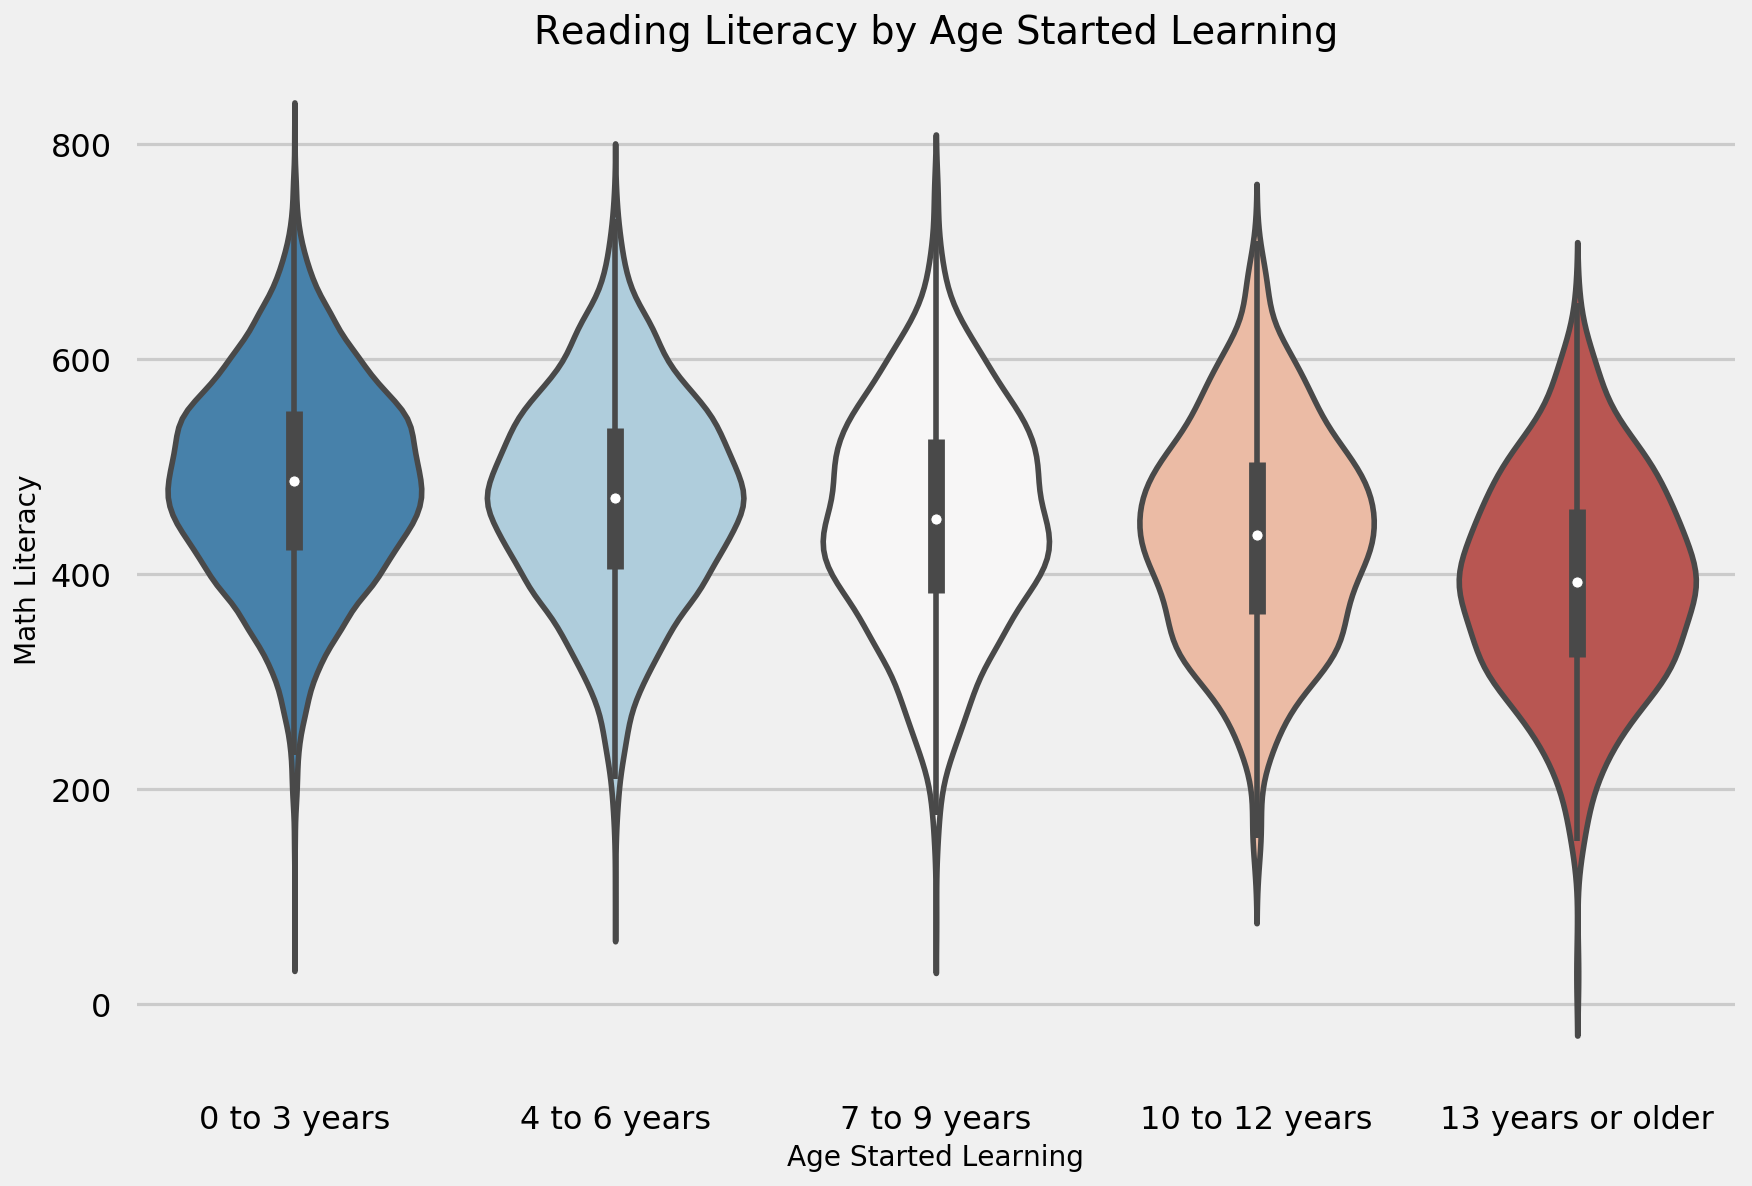

In [43]:
fig, ax = plt.subplots()
sns.violinplot(data=df_clean,
               x='age_start_learn',
               y='read_literacy',
               palette='RdBu_r')
ax.set_ylabel("Math Literacy", fontsize=14)
ax.set_xlabel("Age Started Learning", fontsize=14)
ax.set_title("Reading Literacy by Age Started Learning")
plt.show()


From a visual inspection, it appears that math literacy declines the longer a student goes before starting to learn. Below I'll perform some regression analysis to determine if this decline is statistically significant.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Relationship between Gender, Age Started Learning Language, and Reading Literacy

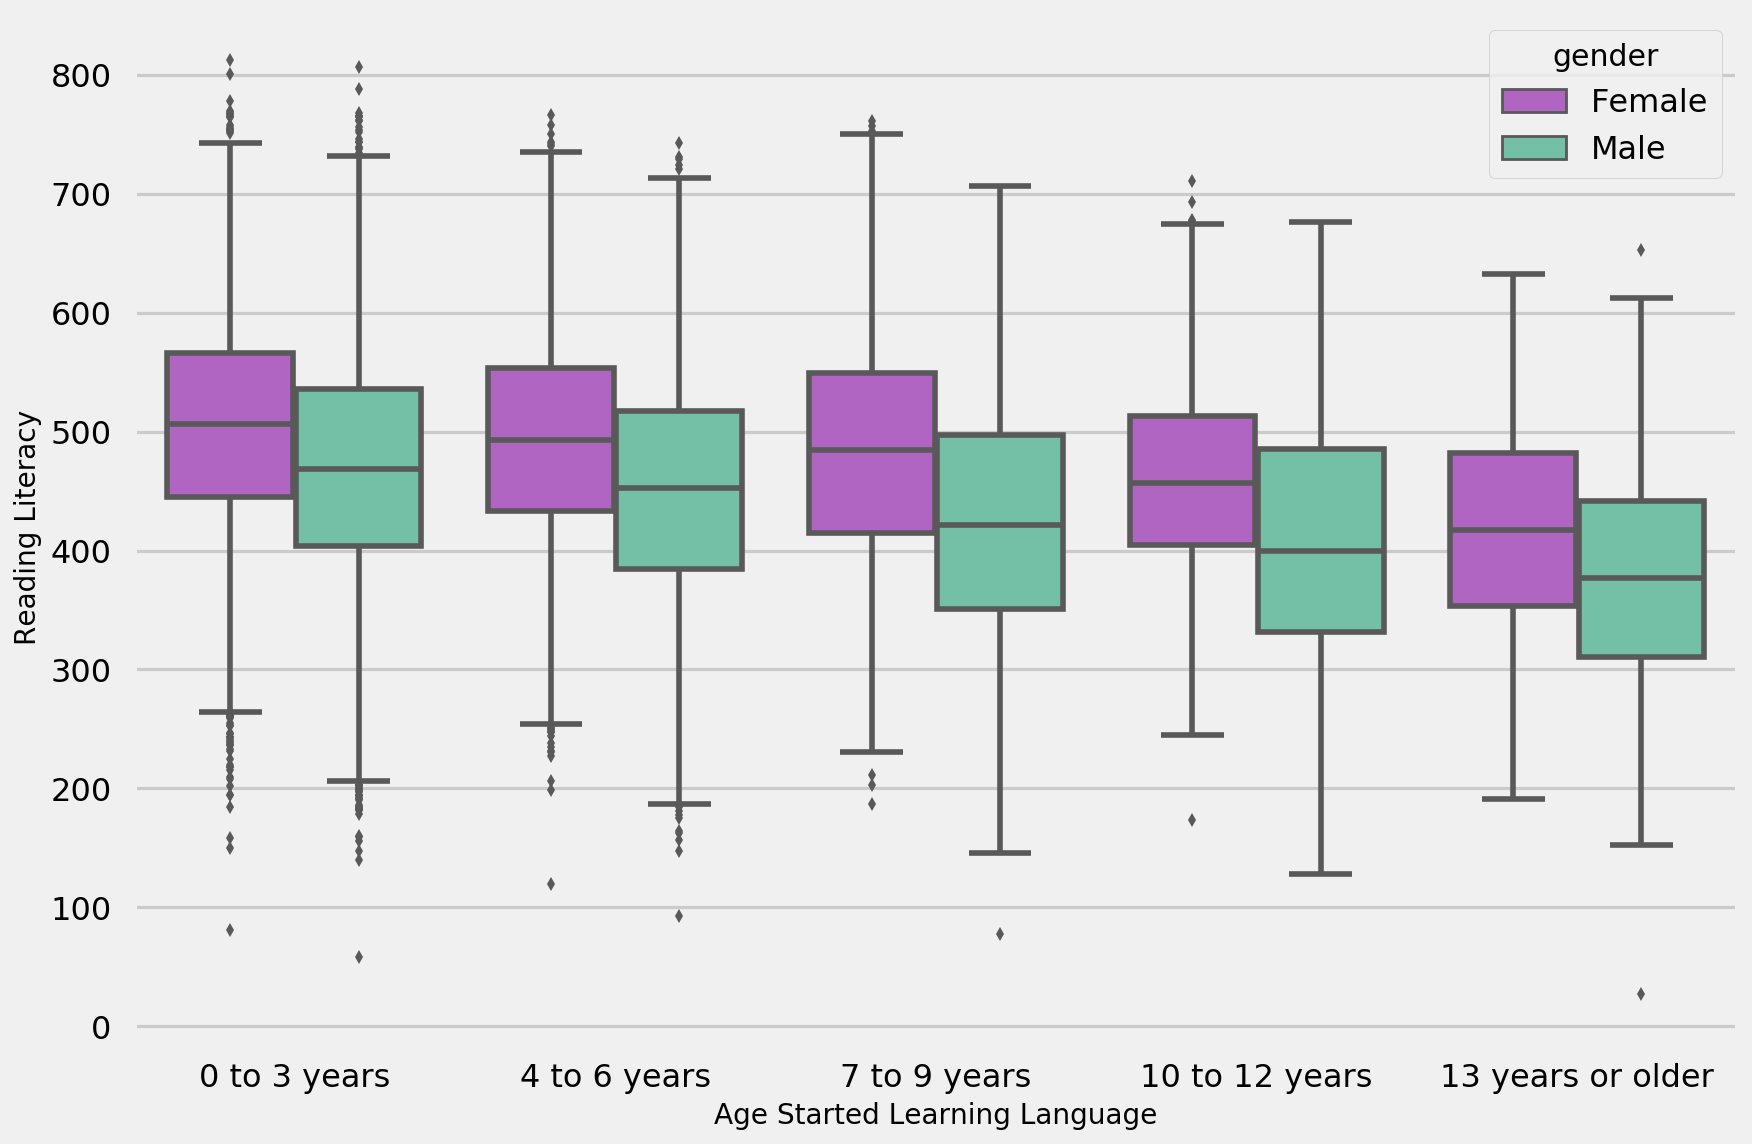

In [44]:
fig, ax = plt.subplots()
sns.boxplot(data=df_clean,
            x='age_start_learn',
            y='read_literacy',
            palette=['mediumorchid', 'mediumaquamarine'],
            hue='gender')
ax.set_ylabel("Reading Literacy", fontsize=14)
ax.set_xlabel("Age Started Learning Language", fontsize=14)
plt.show()


Here we observe again that reading performance appears to decline the later a student learned the test language. Keep in mind that the test subjects were 15-year-olds, meaning that students who only started learning the test language at 13 years or older had fewer than two years of familiarity with the language at test time.

Male students appear to perform worse overall than female students, and the performance gap seems to increase the later students first began learning the language. Below we'll investigate the statistical significance of this.

### Relationship between ESCS, Age Started Learning, and Reading Literacy

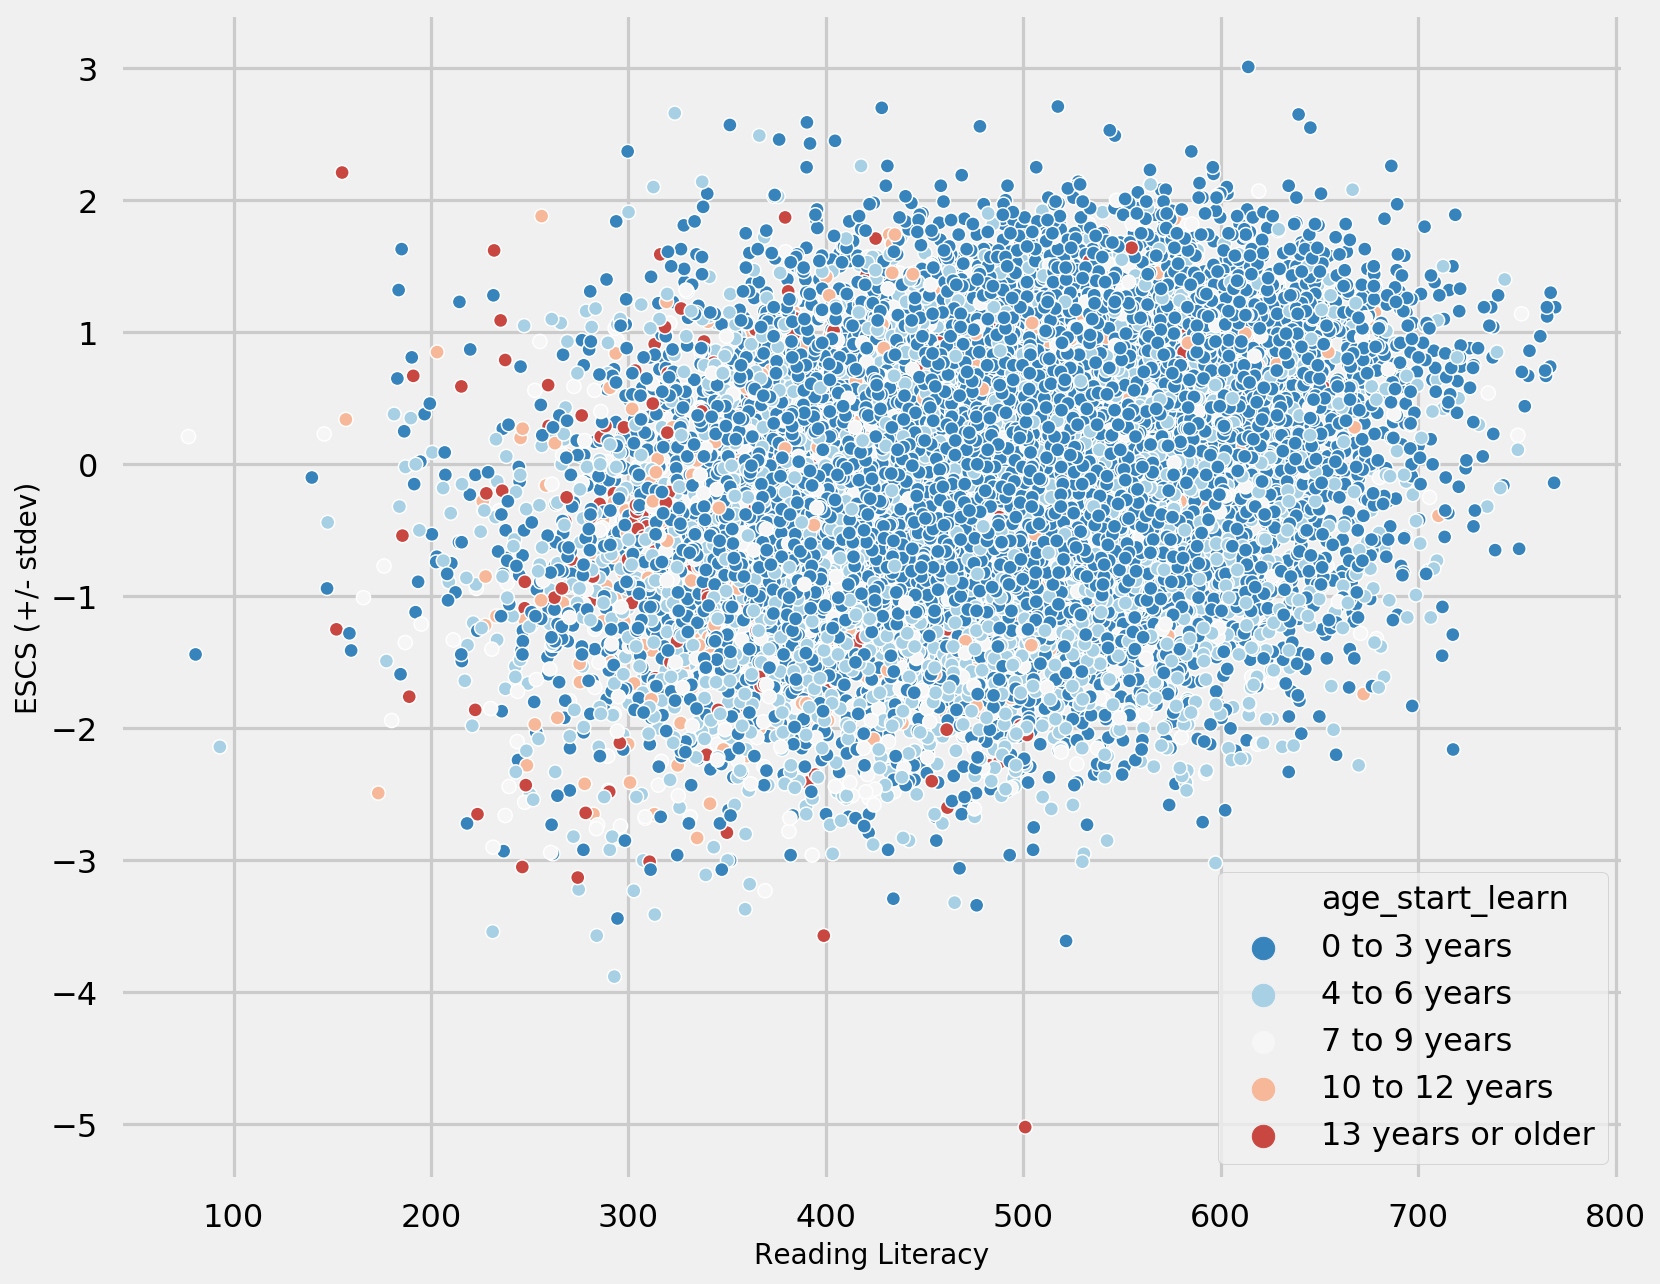

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.scatterplot(data=df_clean.dropna(),
                x='read_literacy',
                y='ESCS',
                palette="RdBu_r",
                hue='age_start_learn',
                s=50)
ax.set_xlabel("Reading Literacy", fontsize=14)
ax.set_ylabel("ESCS (+/- stdev)", fontsize=14)
plt.show()


### Relationship between Country, Overall Literacy, and Civil Liberties

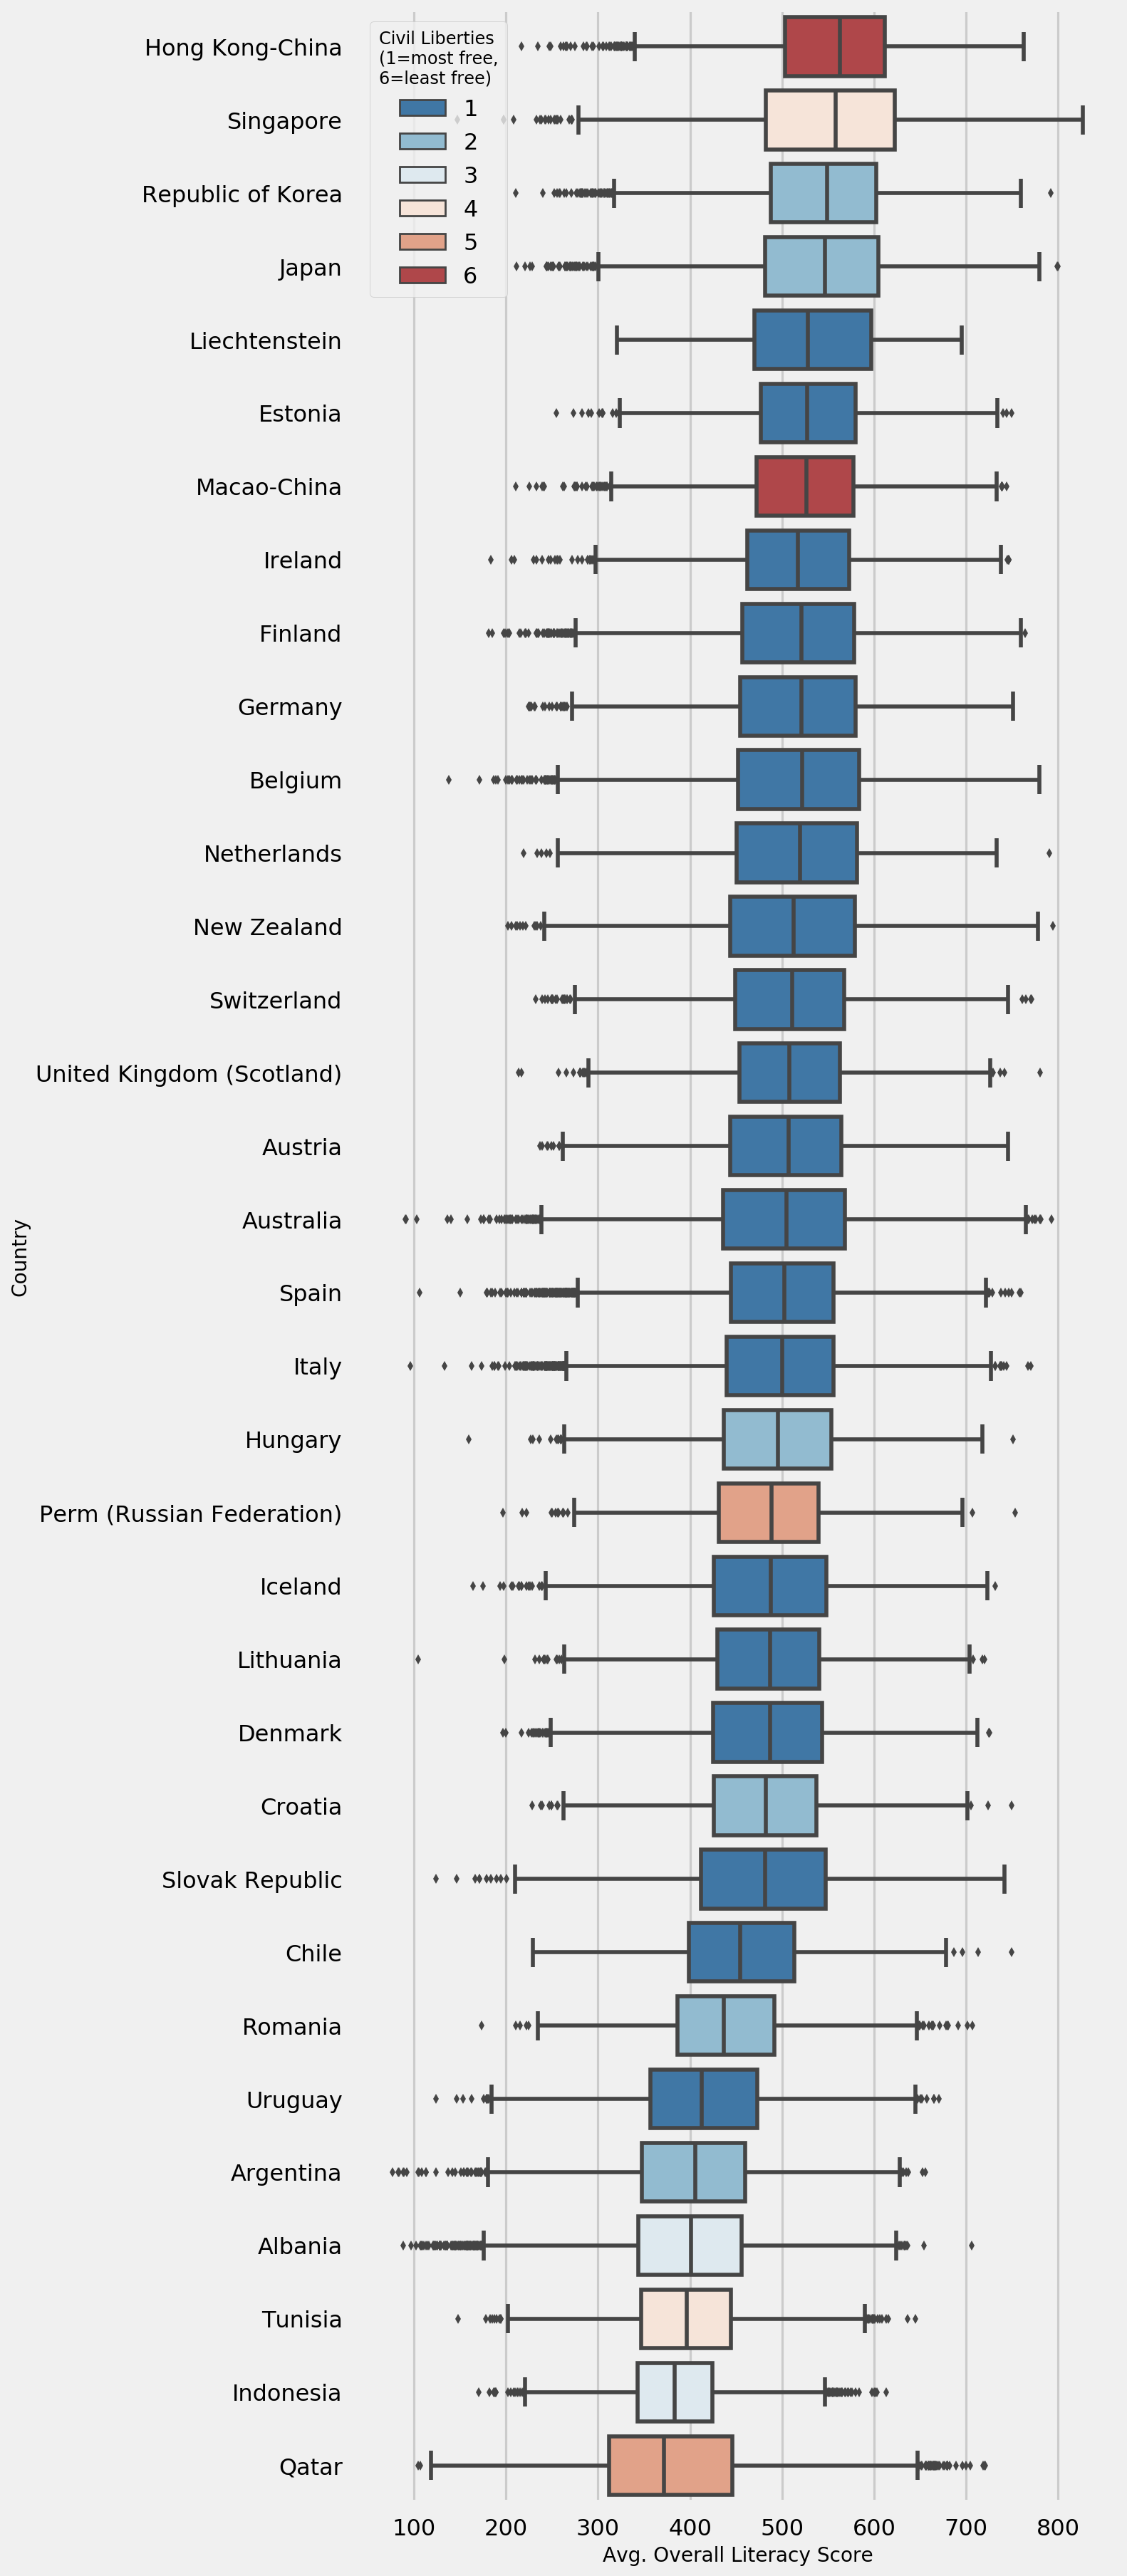

In [46]:
cnt_sort = df_clean.groupby('country')['overall_literacy'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 30)
sns.boxplot(data=df_clean,
            y='country',
            x='overall_literacy',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdBu_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Avg. Overall Literacy Score", fontsize=14)
legend = ax.legend(loc='best', title_fontsize=12).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=16)
plt.show()
fig.savefig("images/overall-literacy-country.png")


### Relationship between Country, ESCS, and Civil Liberties

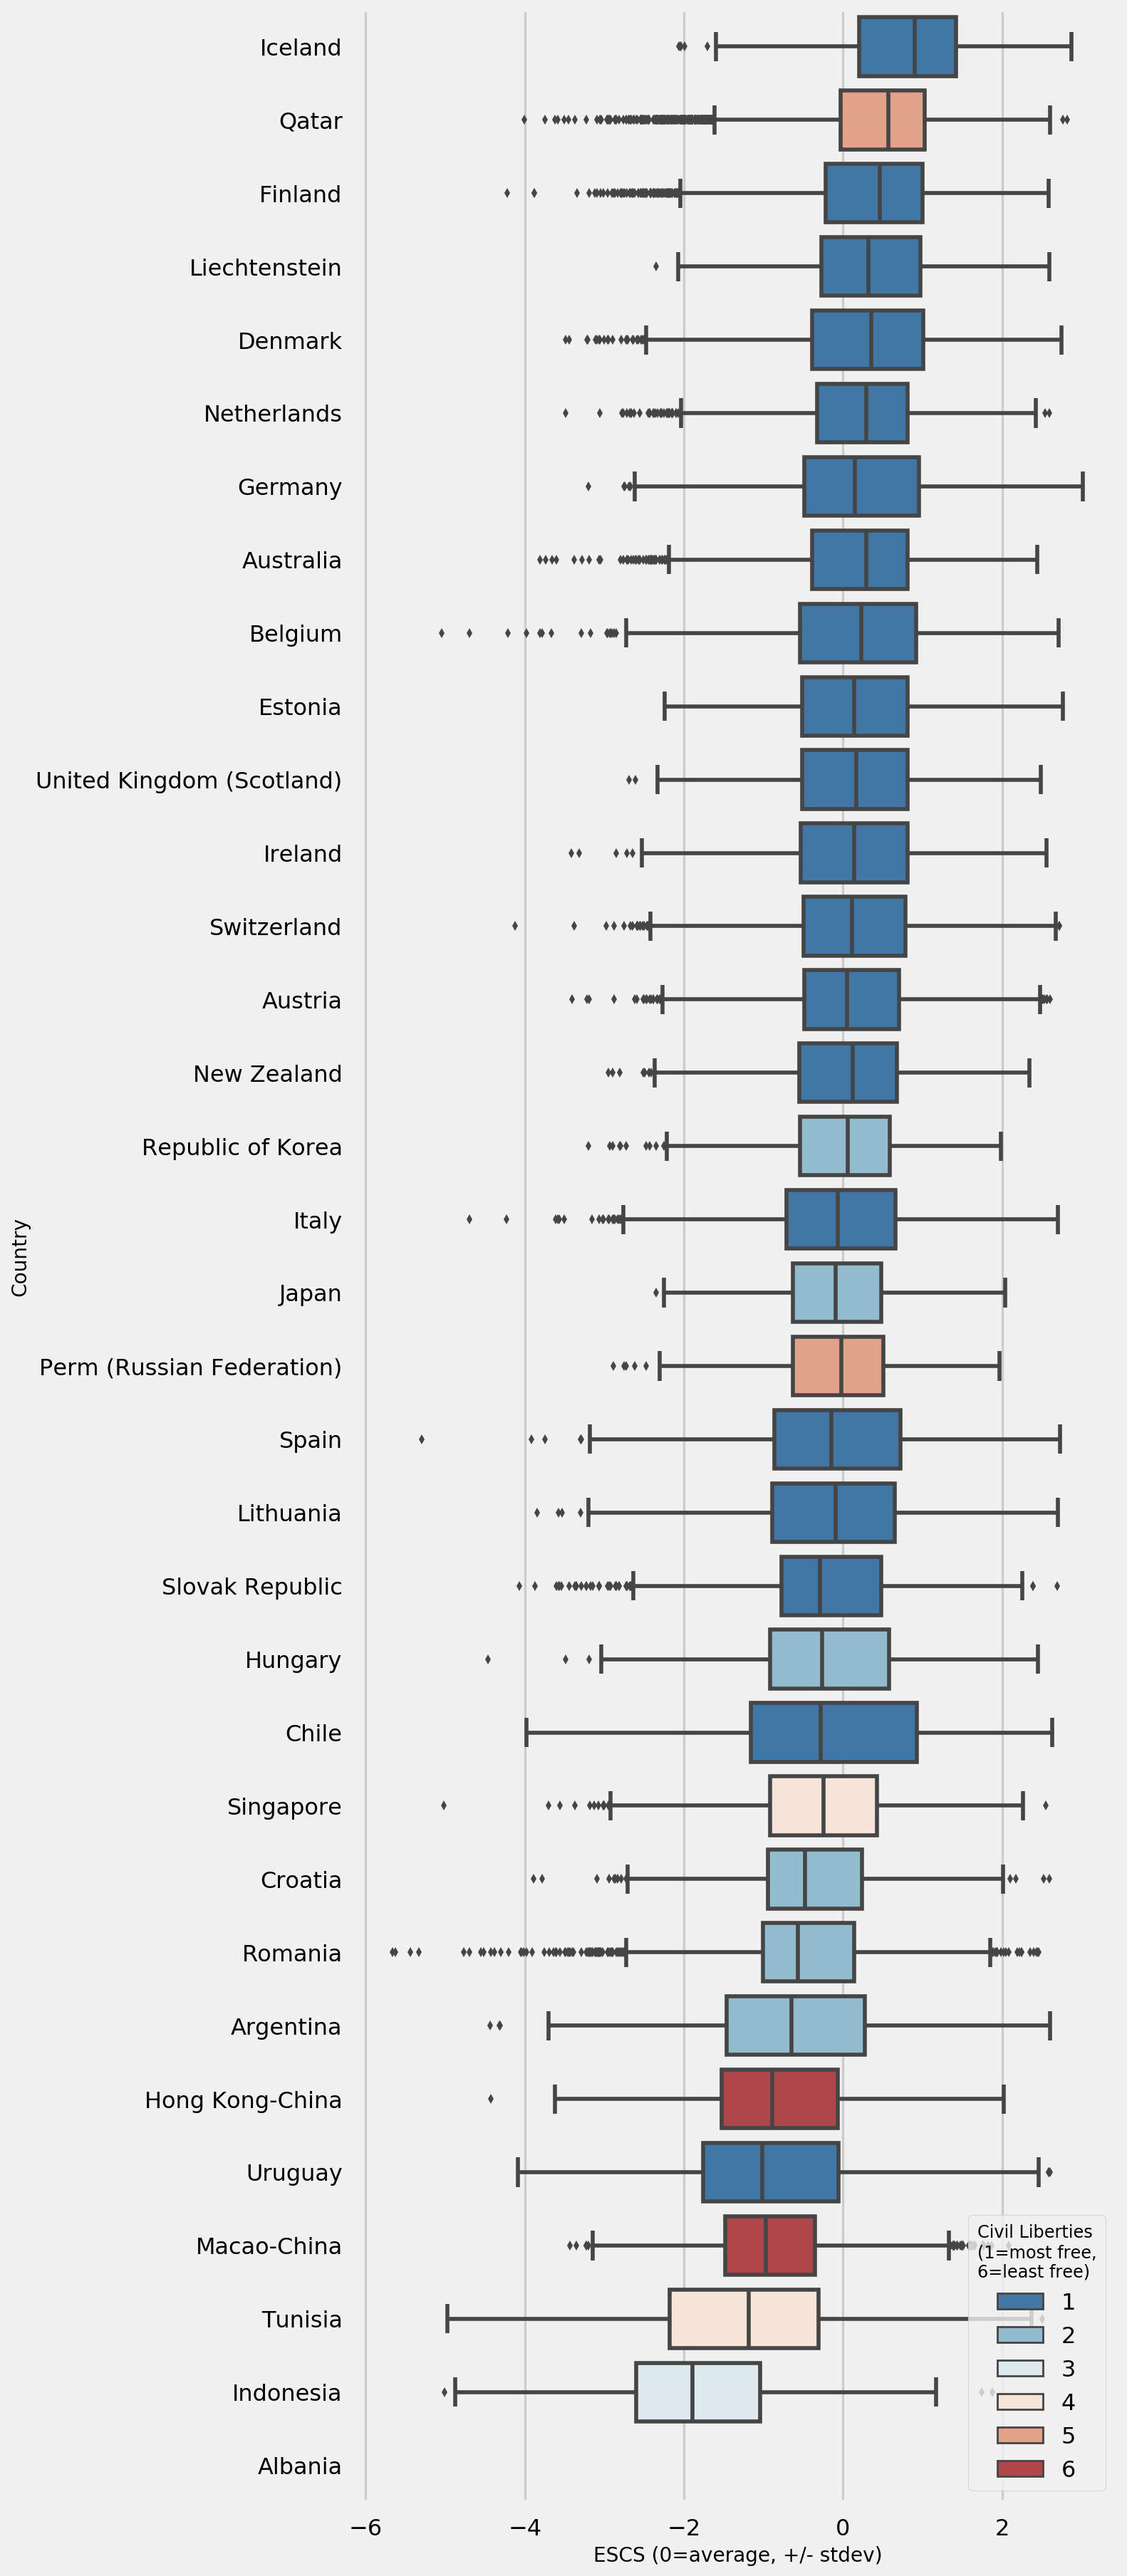

In [47]:
cnt_sort = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 30)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdBu_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=14)
legend = ax.legend(loc='lower right', title_fontsize=12).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=16)
plt.show()
fig.savefig("images/escs-country.png")

ESCS seem to be missing for Albania. That made me suspicious that there was an error on my part, especially because Albania comes first alphabetically and their data were at the top of the imported CSV. However, when I investigated further I found that there was good reason for Albania data to be missing and this was intentional:

> "For example, the reliability of parental occupation data from Albania was subject to scrutiny, resulting in a recommendation that all data dependant on Albania’s parental occupation data (in particular, all data that use the PISA index of economic, social and cultural status \[ESCS\]) should be deleted from the database and relevant tables." (Source: _PISA 2012 Technical Report_, p. 280)

### Relationship between Country, Teacher Rating, and Civil Liberties

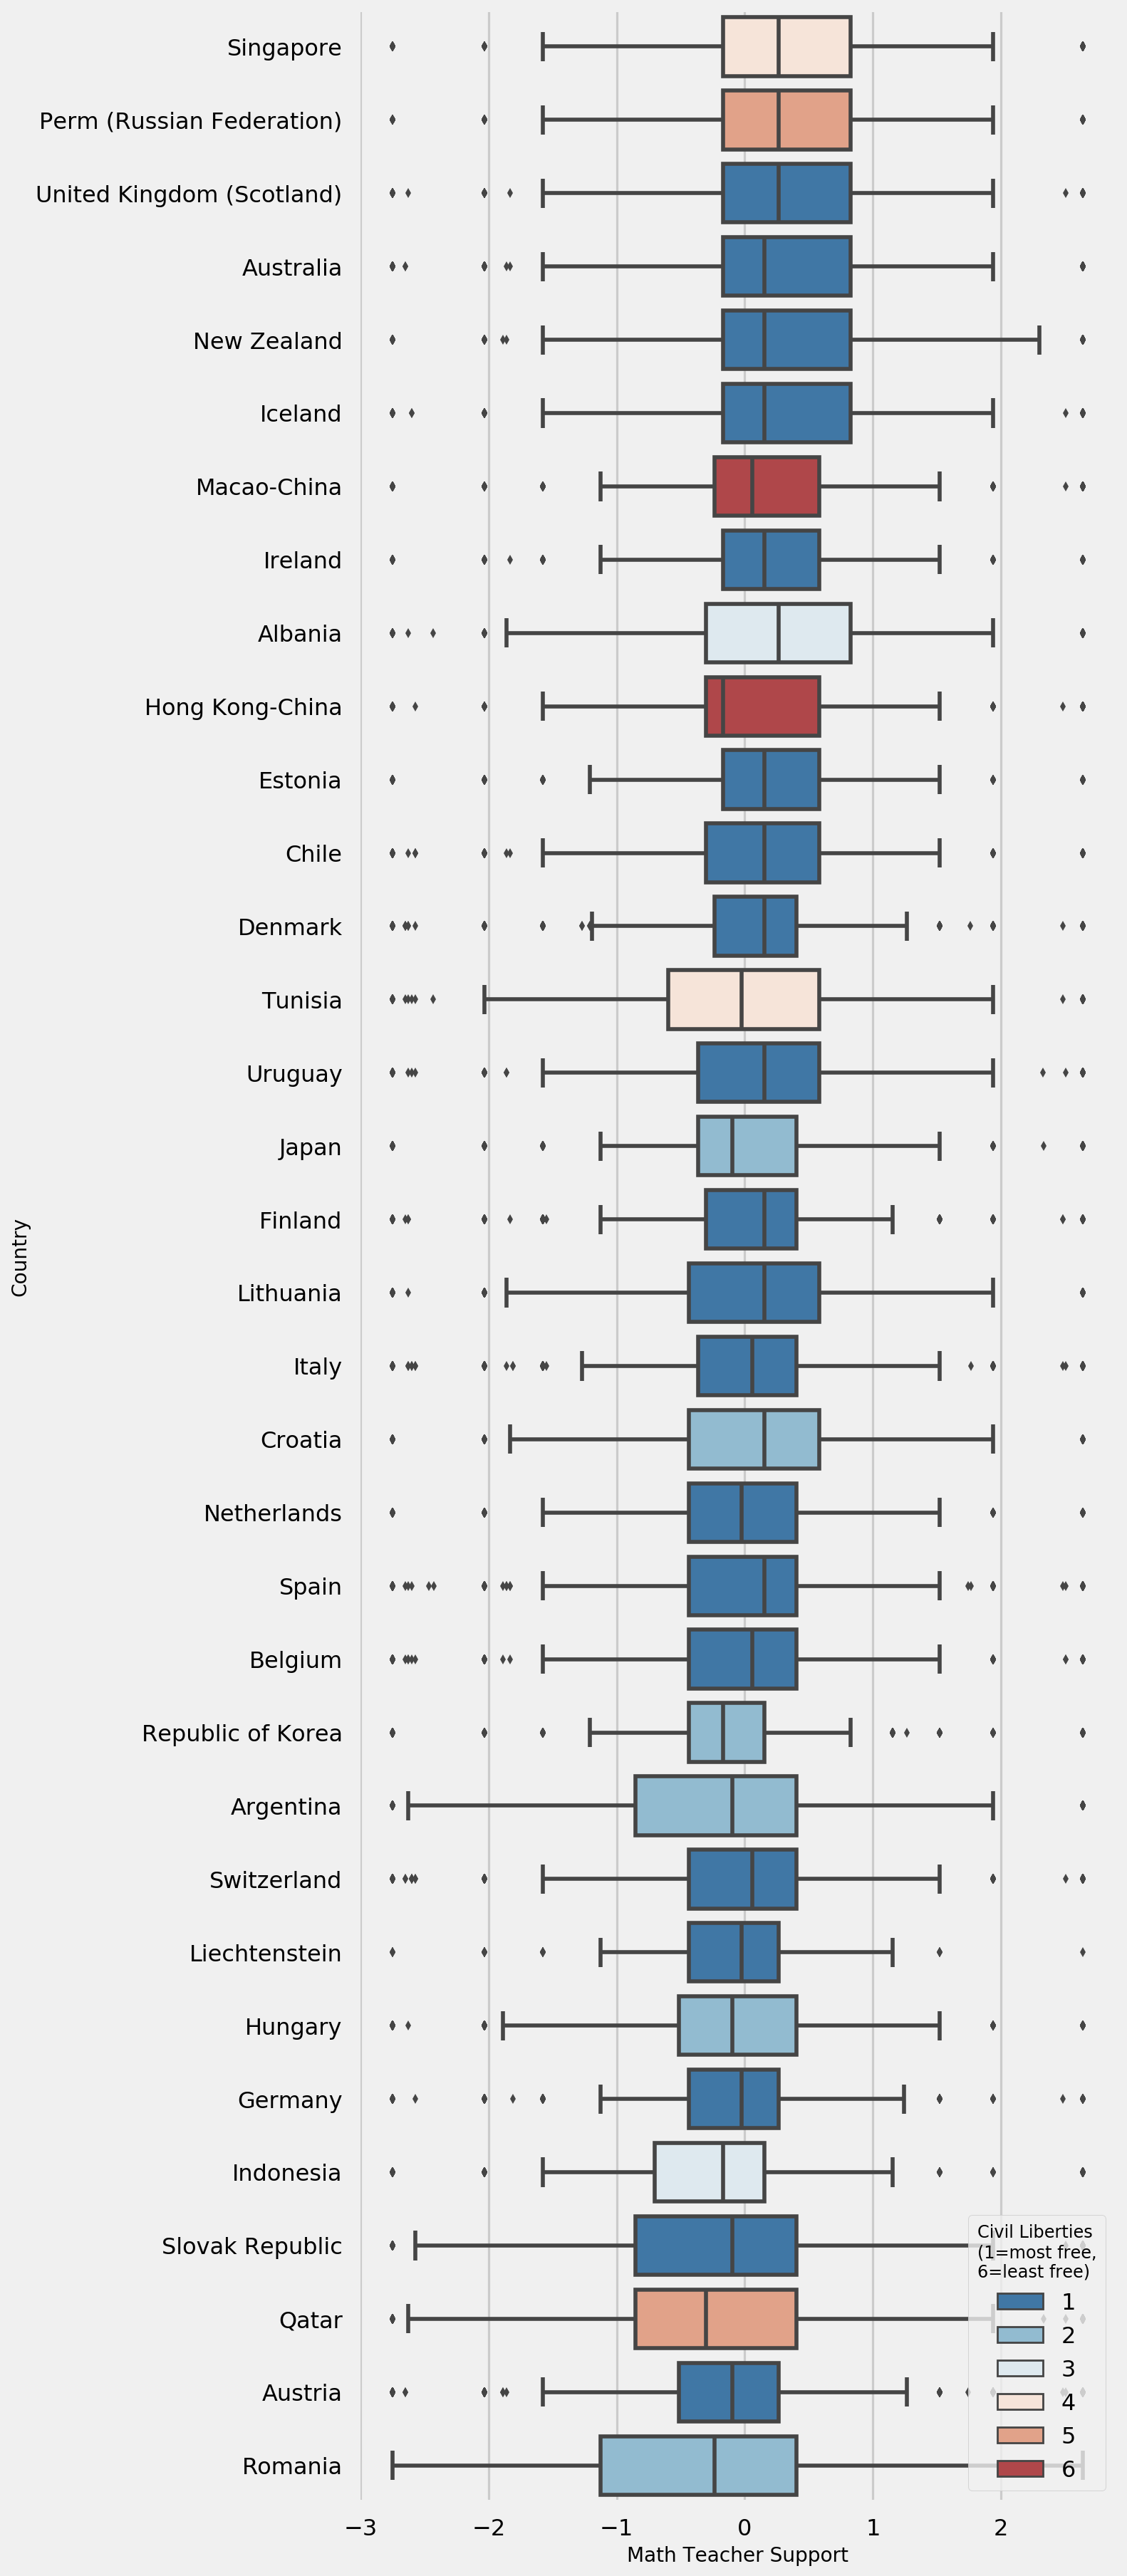

In [50]:
cnt_sort = df_clean.groupby('country')['math_teacher_support'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 30)
sns.boxplot(data=df_clean,
            y='country',
            x='math_teacher_support',
            order=cnt_sort.index.get_level_values('country'),
            dodge=False,
            palette='RdBu_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Math Teacher Support", fontsize=14)
legend = ax.legend(loc='lower right', title_fontsize=12).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=16)
plt.show()
fig.savefig("images/teacher-support-country.png")

## Regression Analysis

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [51]:
df_new = df_clean.copy()
df_new = df_new.dropna()

# Add an intercept column
df_new['intercept'] = 1

In [52]:
# Create one-hot encoded columns for Age Started Learning
df_new = df_new.join(pd.get_dummies(df_new['age_start_learn']))

# Create one-hot encoded columns for Gender
df_new = df_new.join(pd.get_dummies(df_new['gender']))

In [53]:
df_new.head()

student_id  country  ESCS age_start_learn  gender  math_teacher_support  overall_literacy  math_literacy  read_literacy  sci_literacy  civil_liberties  political_rights freedom_status  intercept  0 to 3 years  4 to 6 years  7 to 9 years  10 to 12 years  13 years or older  Female  Male
25134           3  Austria -0.89    0 to 3 years    Male                0.1541        495.062480      534.90422      449.87294     500.41028                1                 1              F          1             1             0             0               0                  0       0     1
25137           6  Austria -1.11    4 to 6 years  Female               -0.3007        464.951227      478.11964      474.60424     442.12980                1                 1              F          1             0             1             0               0                  0       1     0
25141          10  Austria  0.24    0 to 3 years    Male                0.2669        579.504167      610.46112      528.70414     599.34724                1                 1              F          1             1             0             0               0                  0       0     1
25149          18  Austria -0.52    0 to 3 years    Male                0.1541        537.005227      565.98378      512.26426     532.76764                1                 1              F          1             1             0             0               0                  0       0     1
25152          21  Austria -0.31    4 to 6 years    Male                0.0589        493.813420      514.65184      469.92156     496.86686                1                 1              F          1             0             1             0               0                  0       0     1

### Does Age Started Learning affect performance on reading?

Here our null hypothesis is that the mean reading performance for any of the age groups a student began learning ($\mu_{group}$) are equal to the mean of students who began learning between 0 and 3 years ($\mu_{0-3 years}$). We express that as:

$$\large N_{0}: \mu_{group} = \mu_{0-3 years}$$

Our alternative hypothesis is that for individual age groups the mean reading performance is not equal to the overall mean reading performance:

$$\large N_{1}: \mu_{group} \neq \mu_{0-3 years}$$

Our $\alpha$ (alpha) is 0.05.

In [54]:
# Regression analysis of read_literacy scores
# holding back 0 to 3 years age started learning as baseline
lm = sm.OLS(
    df_new['read_literacy'],
    df_new[[
        'intercept', '4 to 6 years', '7 to 9 years',
        '10 to 12 years', '13 years or older'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          read_literacy   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     118.2
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.71e-99
Time:                        15:05:09   Log-Likelihood:                -94271.
No. Observations:               15801   AIC:                         1.886e+05
Df Residuals:                   15796   BIC:                         1.886e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           489.0622      0.917    533.227      0.000     487.264     490.860
4 to 6 years        -15.7844      1.840     -8.579      0.000     -19.391     -12.178
7 to 9 years        -33.0283      3.280    -10.068      0.000     -39.458     -26.598
10 to 12 years      -50.7656      4.319    -11.753      0.000     -59.232     -42.299
13 years or older   -85.1361      5.430    -15.679      0.000     -95.780     -74.493
==============================================================================
Omnibus:                       41.806   Durbin-Watson:                   1.187
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.379
Skew:                          -0.114   Prob(JB):                     1.03e-09
Kurtosis:                       2.898   Cond. No.                         7.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above we can reject the null hypothesis: all of the age groups perform worse in reading when compared to 0 to 3 years. This performance penalty increases as the age a student began learning increases. Students who begin learning later than the ages of 0 to 3 years perform worse on the reading literacy tests. For example, a student who did not begin learning the test language until age 13 or older would be expected to perform -78 points lower than the baseline reading literacy score of a student who began learning the language at ages 0 to 3, all other variables being constant.

Our p-value for all of the tested age groups is p=0.00 which is below our $\alpha$ of 0.05.

In [58]:
# Regression analysis of overall_literacy scores
lm = sm.OLS(
    df_new['math_literacy'],
    df_new[[
        'intercept', 'ESCS', 'civil_liberties', 'math_teacher_support'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          math_literacy   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     1749.
Date:                Wed, 29 May 2019   Prob (F-statistic):               0.00
Time:                        15:05:56   Log-Likelihood:                -92613.
No. Observations:               15801   AIC:                         1.852e+05
Df Residuals:                   15797   BIC:                         1.853e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept              447.1384      1.092    409.376      0.000     444.997     449.279
ESCS                    33.2862      0.729     45.666      0.000      31.857      34.715
civil_liberties         27.6137      0.493     56.041      0.000      26.648      28.580
math_teacher_support    10.8373      0.663     16.356      0.000       9.539      12.136
==============================================================================
Omnibus:                        6.660   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.687
Skew:                          -0.049   Prob(JB):                       0.0353
Kurtosis:                       2.978   Cond. No.                         4.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""